# CSX charts
This notebook contains nearly all charts used in documents in chronological order (the rest can be found in separate .py files) and some calculations that I've conducted. Some variables may recur, as I created charts over course of few weeks. Additionally, if you wish to save charts uncomment lines with `plt.savefig()` commands.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import ConnectionPatch

In [2]:
#read volume and financial data from .csv files
raw_csx_data = pd.read_csv('csx.csv', sep = ';')
data = pd.read_csv('csx_fund.csv', sep = ';')
data.head()

,year,quarter,revenue,eps,net earnings,fcf,dividend,payout ratio ttm,fcf payout ttm,operating ratio,dividends paid,share buyback money,quick,current,av shares outstanding
0,2012,Q1,2996,0.143,449,-25,0.04000,0.266771,0.483381,0.711,125,300,0.86,0.95,3147
1,2012,Q2,3012,0.163,512,93,0.04666,0.272727,0.839228,0.687,145,0,0.82,0.92,3129
2,2012,Q3,2894,0.147,455,406,0.04666,0.283990,1.042389,0.705,145,200,0.71,0.79,3120
3,2012,Q4,2884,0.143,443,131,0.04666,0.300161,0.922314,0.721,143,234,1.01,1.12,3084
4,2013,Q1,2958,0.150,459,240,0.04666,0.308186,0.662069,0.704,143,0,0.92,1.04,3069


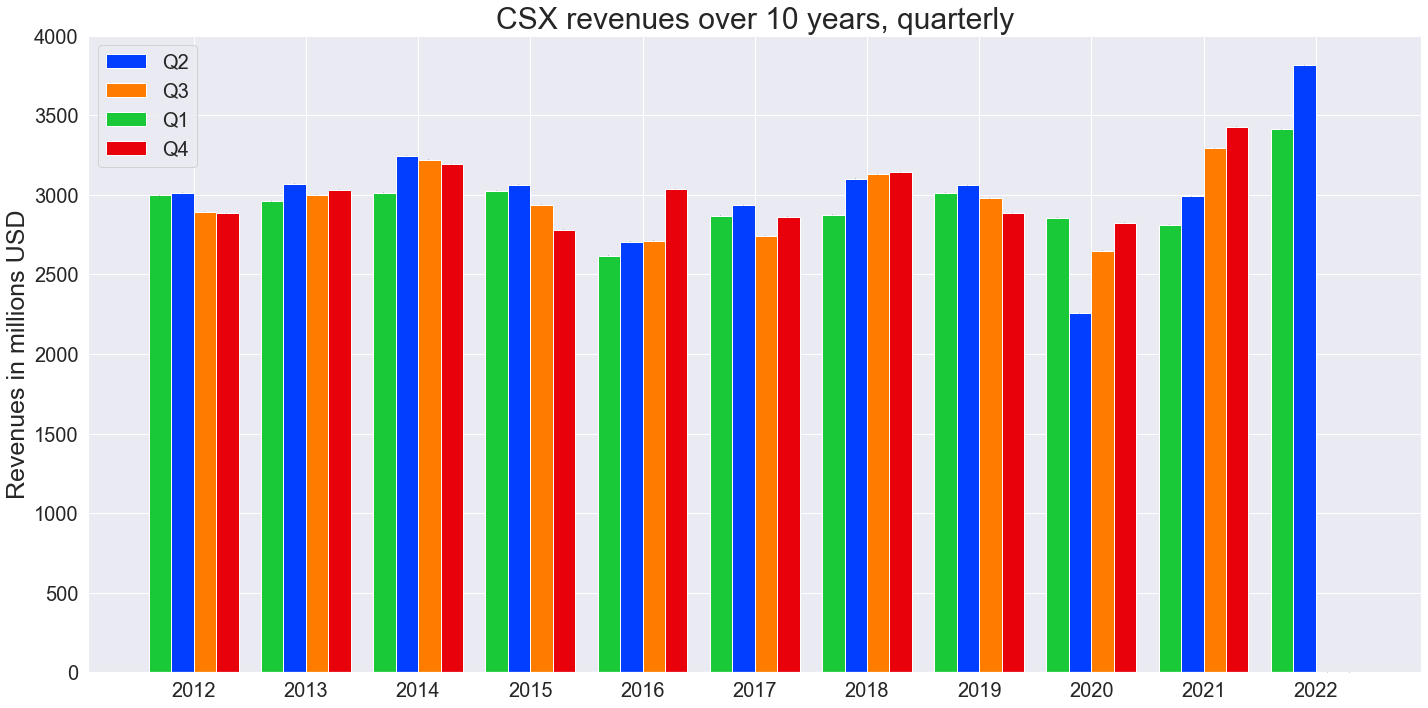

In [3]:
#quarterly revenues of CSX
revenues = data['revenue']
labels = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021','2022']

sns.set_theme(style='darkgrid', palette='bright')
q1 = data['revenue'].loc[(data['quarter'] == 'Q1') ]
q2 = data['revenue'].loc[(data['quarter'] == 'Q2') ]
q3 = data['revenue'].loc[(data['quarter'] == 'Q3') ]
q4 = data['revenue'].loc[(data['quarter'] == 'Q4') ]

fig, ax = plt.subplots(figsize = (20, 10))
x = np.arange(len(labels))
width = 0.2

q2s = ax.bar(x - width/2, q2, width, label='Q2')
q3s = ax.bar(x + width/2, q3, width, label='Q3')
q1s = ax.bar(x - 3*width/2, q1, width, label='Q1')
q4s = ax.bar(x + 3*width/2, q4, width, label='Q4')

ax.set_ylabel('Revenues in millions USD', fontsize = 25)
ax.set_title('CSX revenues over 10 years, quarterly', fontsize = 30)
ax.set_xticks(x, labels, fontsize = 25)
ax.legend(fontsize = 20)

ax.bar_label(q1s, fontsize=0)
ax.bar_label(q2s, fontsize=0)
ax.bar_label(q3s, fontsize=0)
ax.bar_label(q4s, fontsize=0)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

fig.tight_layout()
#plt.savefig('revenues_quarterly.png')

In [4]:
#calculating average revenue per quarter
q1_10y = data['revenue'].loc[(data['quarter'] == 'Q1') & (data['year'] != 2022)]
q2_10y = data['revenue'].loc[(data['quarter'] == 'Q2') & (data['year'] != 2022)]
q3_10y = data['revenue'].loc[(data['quarter'] == 'Q3') & (data['year'] != 2022)]
q4_10y = data['revenue'].loc[(data['quarter'] == 'Q4') & (data['year'] != 2022)]

q1_rev_mean = np.mean(q1_10y)
q2_rev_mean = np.mean(q2_10y)
q3_rev_mean = np.mean(q3_10y)
q4_rev_mean = np.mean(q4_10y)

print(q1_rev_mean, q2_rev_mean, q3_rev_mean, q4_rev_mean)

2903.7 2943.4 2955.3 3006.9


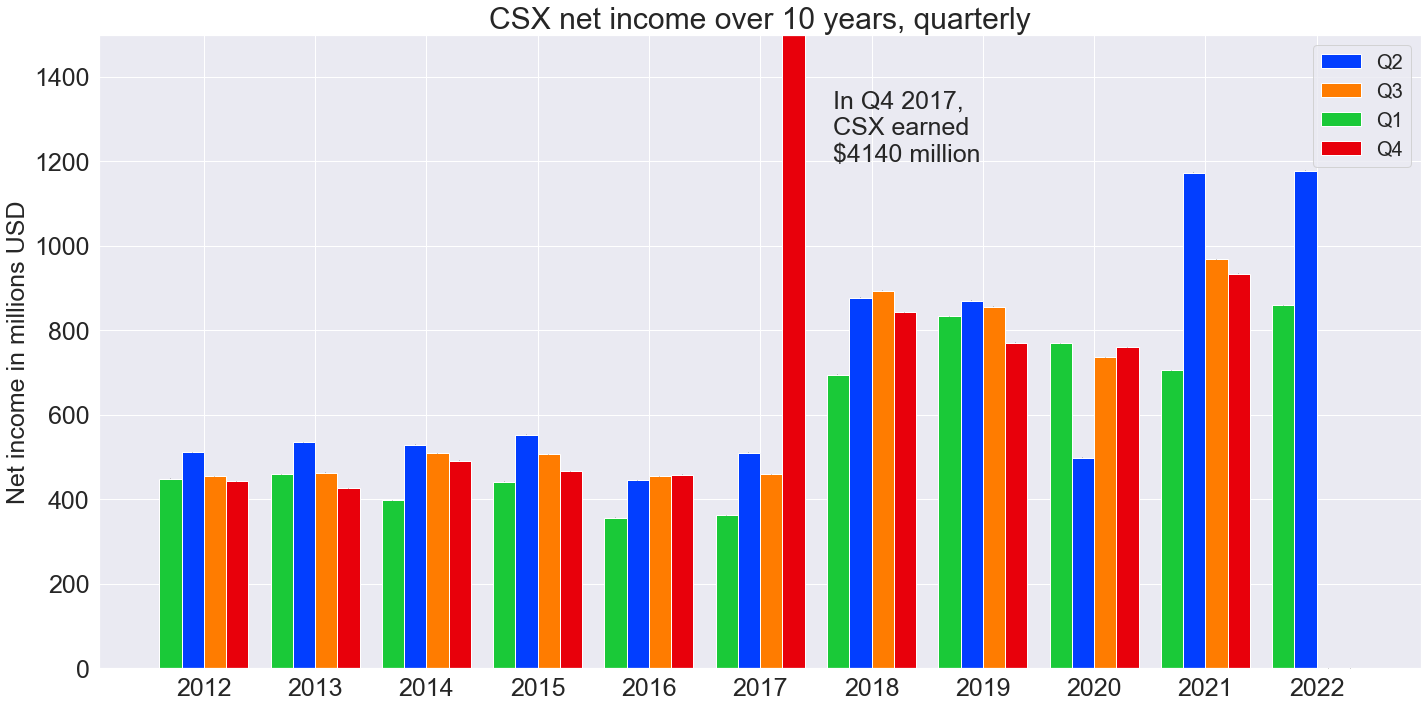

In [5]:
#quarterly net income of CSX
earnings = data['net earnings']

q1 = data['net earnings'].loc[(data['quarter'] == 'Q1') ]
q2 = data['net earnings'].loc[(data['quarter'] == 'Q2') ]
q3 = data['net earnings'].loc[(data['quarter'] == 'Q3') ]
q4 = data['net earnings'].loc[(data['quarter'] == 'Q4') ]

fig, ax = plt.subplots(figsize = (20, 10))
x = np.arange(len(labels))
width = 0.2

q2s = ax.bar(x - width/2, q2, width, label='Q2')
q3s = ax.bar(x + width/2, q3, width, label='Q3')
q1s = ax.bar(x - 3*width/2, q1, width, label='Q1')
q4s = ax.bar(x + 3*width/2, q4, width, label='Q4')

ax.set_ylabel('Net income in millions USD', fontsize = 25)
ax.set_title('CSX net income over 10 years, quarterly', fontsize = 30)
ax.set_xticks(x, labels, fontsize = 25)
ax.legend(fontsize = 20)

ax.bar_label(q1s, fontsize=0)
ax.bar_label(q2s, fontsize=0)
ax.bar_label(q3s, fontsize=0)
ax.bar_label(q4s, fontsize=0)
ax.set_ylim([0, 1500])
ax.yaxis.set_tick_params(labelsize=25)

annotation = (5.65, 1200)
ax.annotate("In Q4 2017,\nCSX earned\n$4140 million", annotation, fontsize = 25)

fig.tight_layout()
#plt.savefig('earnings_quarter.png')

7.357583824004821


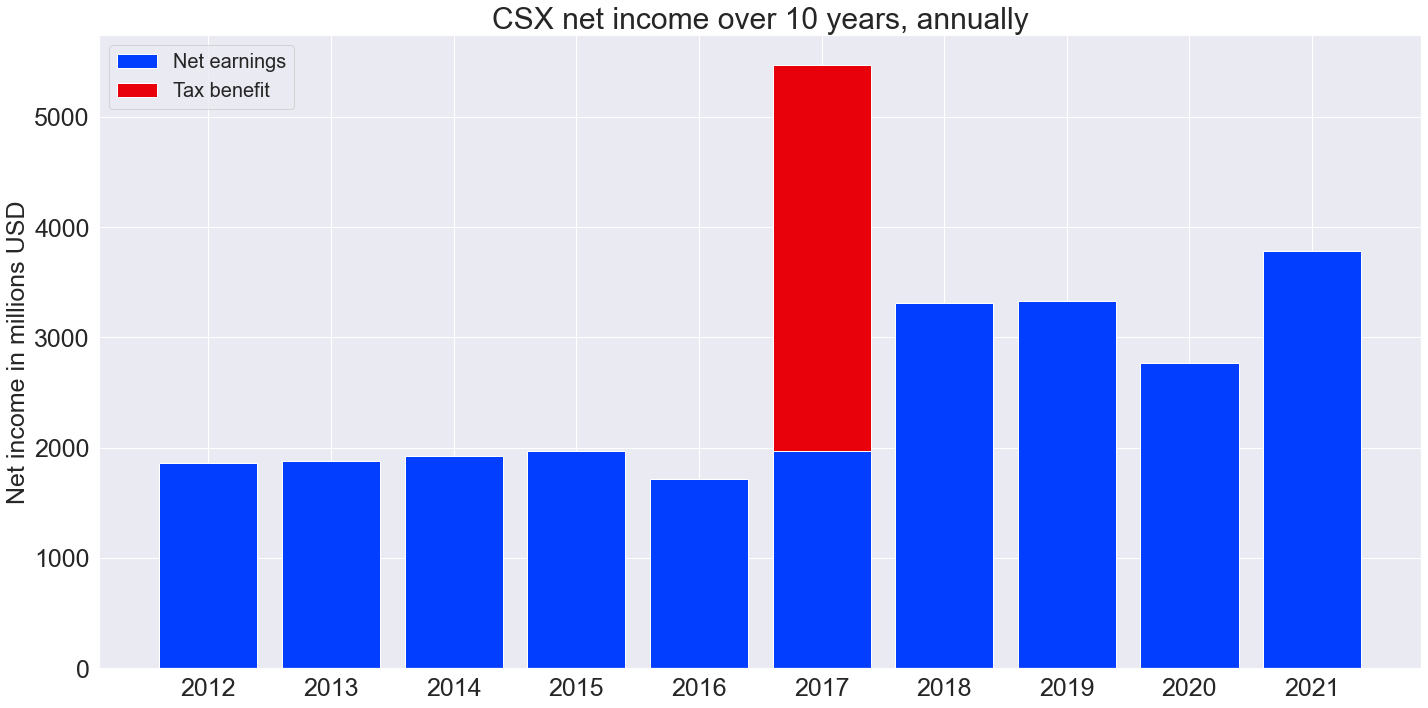

In [6]:
labels_no_22 = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
years = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
ann_net =[]

for year in years:
    ann_net.append(np.sum(data['net earnings'].loc[(data['year'] == year)]))

ann_net[5] = 1971
fig, ax = plt.subplots(figsize = (20, 10))
x = np.arange(len(labels_no_22))
width = 0.2

ax.bar(labels_no_22, ann_net, label = 'Net earnings')
ax.bar('2017', 3500, bottom = ann_net[5], color = 'r', label = 'Tax benefit')
ax.set_xticks(x, labels_no_22, fontsize = 25)

ax.set_ylabel('Net income in millions USD', fontsize = 25)
ax.set_title('CSX net income over 10 years, annually', fontsize = 30)
ax.legend(loc = "upper left", fontsize = 20)
ax.yaxis.set_tick_params(labelsize=25)
fig.tight_layout()
#plt.savefig('earnings_annual.png')


#calculating net income CAGR
net_an_cagr = ((ann_net[-1]/ann_net[0]) ** (1/10) -1 ) * 100
print(net_an_cagr)

In [7]:
#mean quarterly net earnings adjusted for tax benefits in 2017
q1_10y = data['net earnings'].loc[(data['quarter'] == 'Q1') & (data['year'] != 2022)]
q2_10y = data['net earnings'].loc[(data['quarter'] == 'Q2') & (data['year'] != 2022)]
q3_10y = data['net earnings'].loc[(data['quarter'] == 'Q3') & (data['year'] != 2022)]
q4_10y = data['net earnings'].loc[(data['quarter'] == 'Q4') & (data['year'] != 2022)]

q4_10y.update({23: 983})

q1_rev_mean = np.mean(q1_10y)
q2_rev_mean = np.mean(q2_10y)
q3_rev_mean = np.mean(q3_10y)
q4_rev_mean = np.mean(q4_10y)

print(q1_rev_mean, q2_rev_mean, q3_rev_mean, q4_rev_mean)

547.1 650.3 630.2 657.5


7.5686457294780185


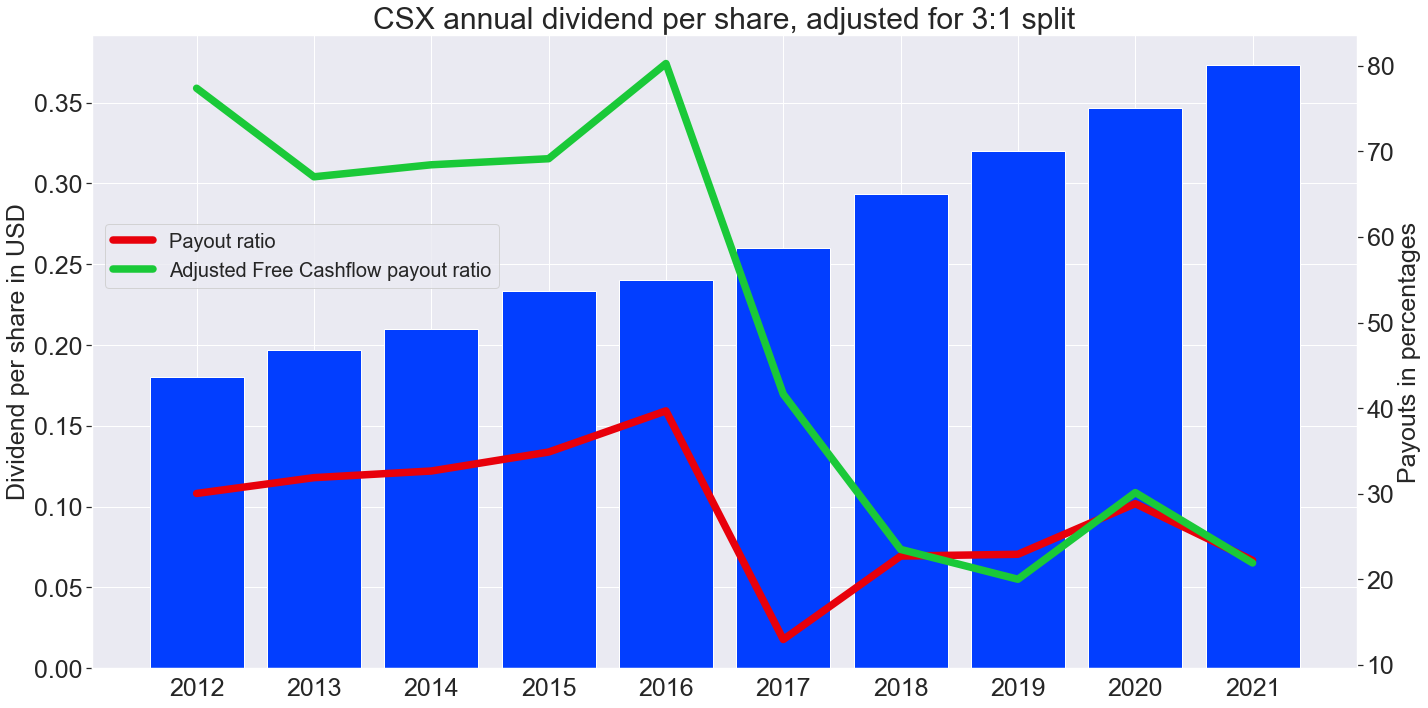

In [8]:
#annual DPS
divs_an_list = []
payout_an_list = []
dps_an_list = []
fcf_payout_an_list = []

full_year_fcf = [721, 895, 919, 992, 847, 1701, 3199, 3818, 2646, 3833]
i = 0

for year in years:
    divs_an_list.append(np.sum(data['dividends paid'].loc[(data['year'] == year)]))
    dps_an_list.append(np.sum(data['dividend'].loc[(data['year'] == year)]))
    payout_an_list.append((np.sum(data['dividends paid'].loc[(data['year'] == year)]))/(np.sum(data['net earnings'].loc[(data['year'] == year)])) * 100)
    fcf_payout_an_list.append((np.sum(data['dividends paid'].loc[(data['year'] == year)]))/full_year_fcf[i] * 100)
    i += 1

sns.set_style("dark")
fig, ax = plt.subplots(figsize = (20, 10))
ax2 = ax.twinx()
width = 0.2

ax2.plot(labels_no_22, payout_an_list, color = 'r',linewidth = '7.5', label = 'Payout ratio')
ax2.plot(labels_no_22, fcf_payout_an_list, color = 'g',linewidth = '7.5', label = 'Adjusted Free Cashflow payout ratio')
ax.grid()
ax.bar(labels_no_22, dps_an_list)
ax.set_xticks(x, labels_no_22, fontsize = 25)
ax.set_ylabel('Dividend per share in USD', fontsize = 25)
ax.set_title('CSX annual dividend per share, adjusted for 3:1 split', fontsize = 30)
ax2.set_ylabel('Payouts in percentages', fontsize = 25)
ax2.legend(loc = (0.01, 0.6), fontsize = 20)
ax.yaxis.set_tick_params(labelsize=25)
ax2.yaxis.set_tick_params(labelsize=25)
fig.tight_layout()
#plt.savefig('dividends_payouts_annual.png')

div_an_cagr = ((dps_an_list[-1]/dps_an_list[0]) ** (1/10) -1 ) * 100
print(div_an_cagr)

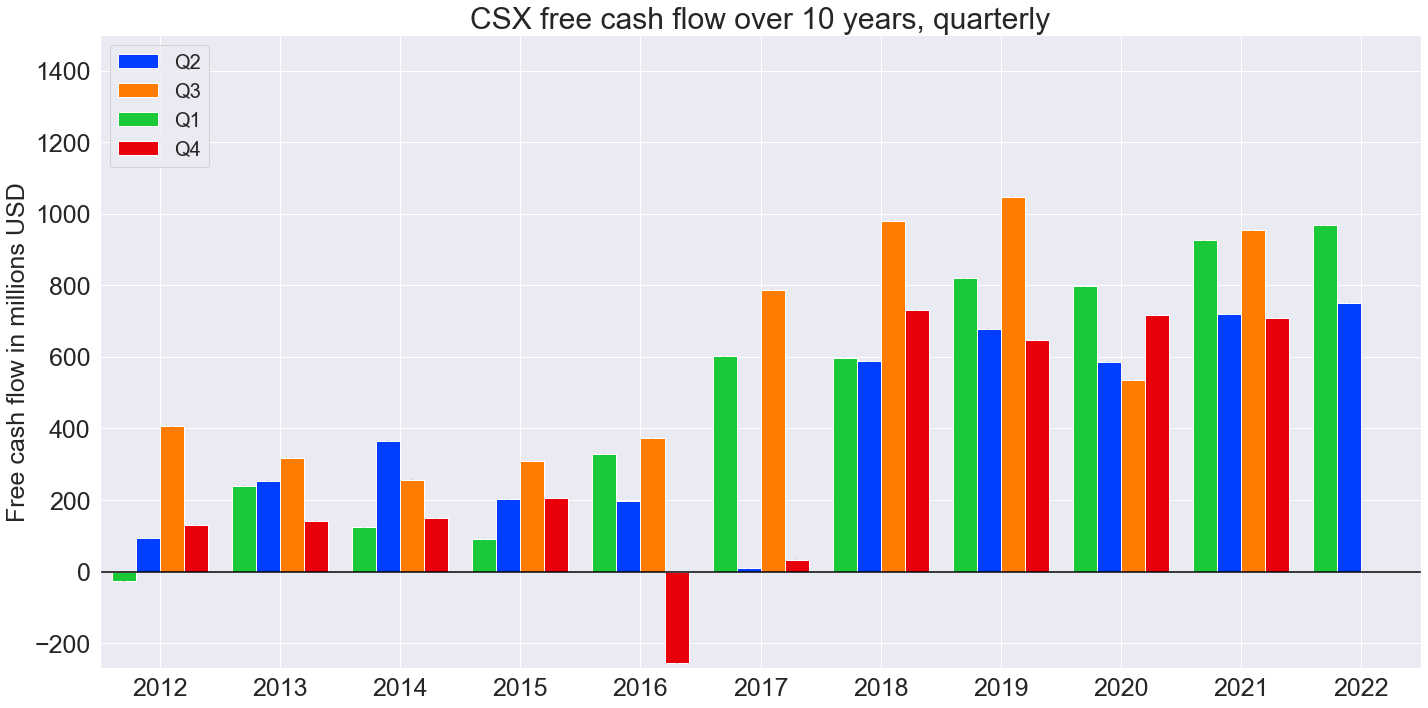

In [9]:
#free cash flow quarterly
earnings = data['fcf']
labels = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021','2022']

sns.set_style("dark")
q1 = data['fcf'].loc[(data['quarter'] == 'Q1') ]
q2 = data['fcf'].loc[(data['quarter'] == 'Q2') ]
q3 = data['fcf'].loc[(data['quarter'] == 'Q3') ]
q4 = data['fcf'].loc[(data['quarter'] == 'Q4') ]

fig, ax = plt.subplots(figsize = (20, 10))
x = np.arange(len(labels))
x2 = np.arange(len(labels) + 1)
width = 0.2

q2s = ax.bar(x - width/2, q2, width, label='Q2')
q3s = ax.bar(x + width/2, q3, width, label='Q3')
q1s = ax.bar(x - 3*width/2, q1, width, label='Q1')
q4s = ax.bar(x + 3*width/2, q4, width, label='Q4')

ax.set_ylabel('Free cash flow in millions USD', fontsize = 25)
ax.set_title('CSX free cash flow over 10 years, quarterly', fontsize = 30)
ax.set_xticks(x, labels, fontsize = 25)
ax.legend(loc = 2, fontsize = 20)
ax.grid()
ax.bar_label(q1s, fontsize=0)
ax.bar_label(q2s, fontsize=0)
ax.bar_label(q3s, fontsize=0)
ax.bar_label(q4s, fontsize=0)
ax.plot(x2 - 0.5, 0*x2, color = 'black')
ax.set_ylim([-270, 1500])
ax.set_xlim([-0.5, 10.5])
ax.yaxis.set_tick_params(labelsize=25)

fig.tight_layout()
#plt.savefig('fcf_quarter.png')

In [10]:
#calculating free cash flow CAGR for peers
net_an_cagr_cp = ((2276/464) ** (1/10) -1 ) * 100
print(net_an_cagr_cp)
net_an_cagr_cni = ((3903/2682) ** (1/10) -1 ) * 100
print(net_an_cagr_cni)
net_an_cagr_unp = ((6523/3943) ** (1/10) -1 ) * 100
print(net_an_cagr_unp)
net_an_cagr_nsc = ((3003/1740) ** (1/10) -1 ) * 100
print(net_an_cagr_nsc)

17.237197346512367
3.8230965734951106
5.162780458561378
5.608921707041481


18.18445462852636


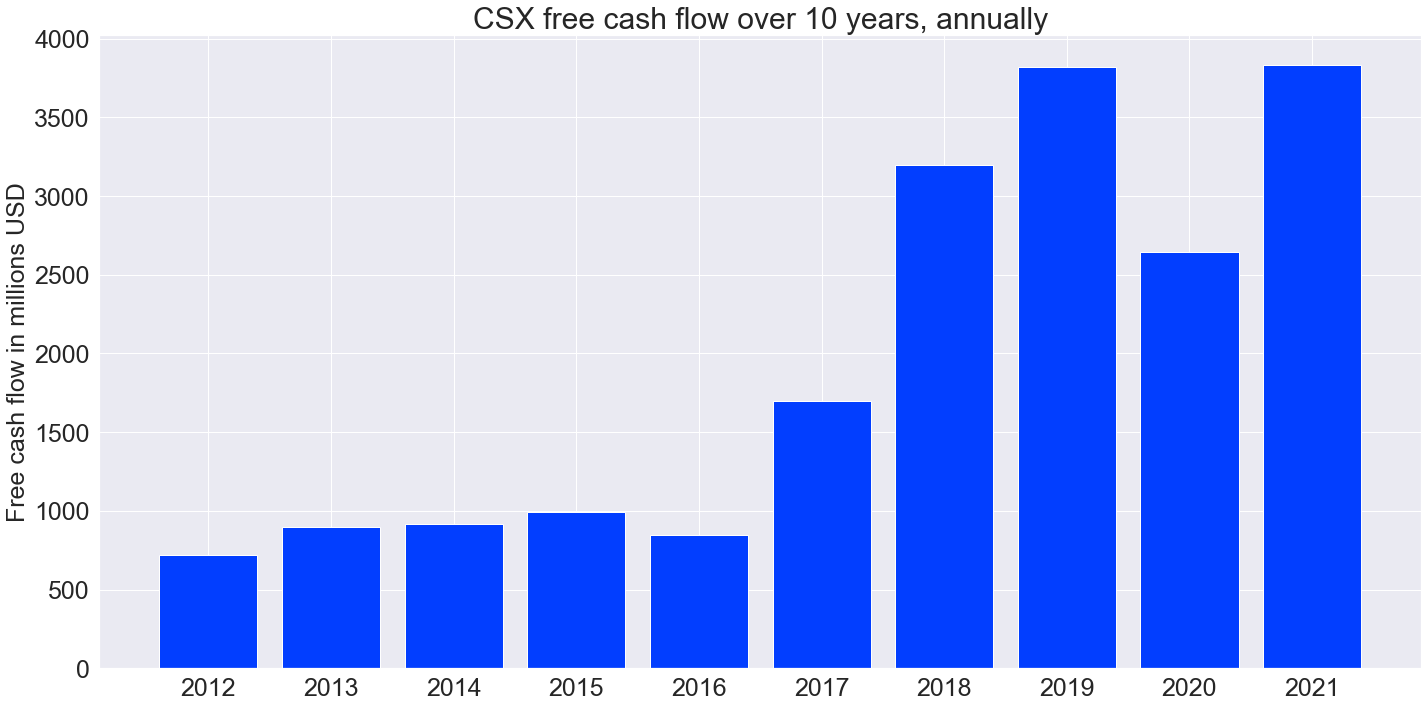

In [11]:
#annual free cash flow
full_year_fcf = [721, 895, 919, 992, 847, 1701, 3199, 3818, 2646, 3833]
sns.set_theme(style='darkgrid', palette='bright')

fig, ax = plt.subplots(figsize = (20, 10))
x = np.arange(len(labels_no_22))
width = 0.2

ax.bar(labels_no_22, full_year_fcf)
ax.set_xticks(x, labels_no_22, fontsize = 25)

ax.set_ylabel('Free cash flow in millions USD', fontsize = 25)
ax.set_title('CSX free cash flow over 10 years, annually', fontsize = 30)
ax.yaxis.set_tick_params(labelsize=25)
fig.tight_layout()
#plt.savefig('fcf_annual.png')

fcf_cagr = ((3833/721) ** (1/10) -1 ) * 100
print(fcf_cagr)

[558, 600, 629, 686, 680, 708, 751, 763, 797, 839]
1723.1


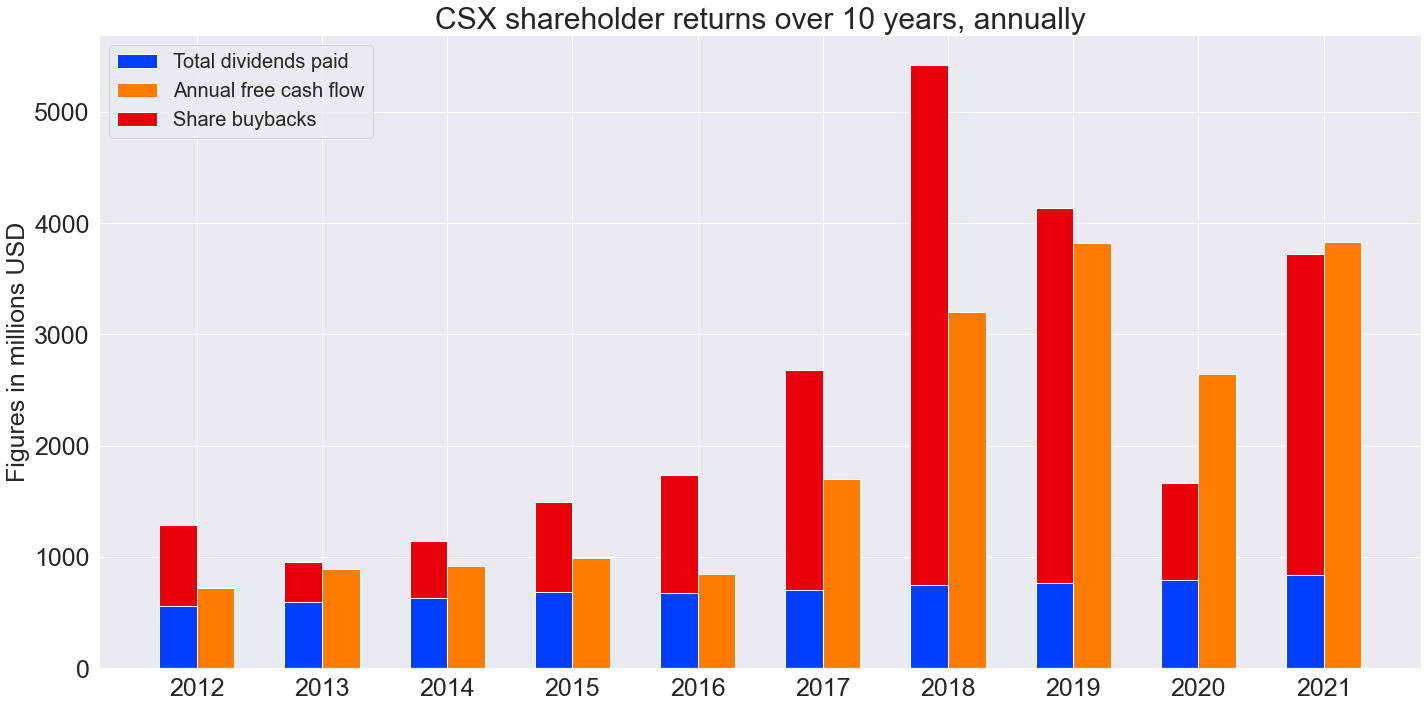

In [12]:
#shareholder returns
buyback_ls = []
full_div = []
years = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

for year in years:
    buyback_ls.append(np.sum(data['share buyback money'].loc[(data['year'] == year)]))
    full_div.append(np.sum(data['dividends paid'].loc[(data['year'] == year)]))

print(full_div)
fig, ax = plt.subplots(figsize = (20, 10))                   
x = np.arange(len(labels_no_22))
width = 0.3
fc = ax.bar(x - width/2, full_div, width, label='Total dividends paid')
Di = ax.bar(x + width/2, full_year_fcf,width, label='Annual free cash flow')
by = ax.bar(x - width/2, buyback_ls,width, bottom = full_div, color = 'r', label = 'Share buybacks')


ax.set_ylabel('Figures in millions USD', fontsize = 25)
ax.set_title('CSX shareholder returns over 10 years, annually', fontsize = 30)
ax.set_xticks(x, labels_no_22, fontsize = 25)
ax.legend(loc = 2, fontsize = 20)
ax.grid(visible=True)
ax.yaxis.set_tick_params(labelsize=25)
fig.tight_layout()
#plt.savefig('fcf_coverage.png')
ls = []
for i in range(len(full_div)):
    ls.append(full_div[i]/buyback_ls[i])
print(np.mean(buyback_ls))

In [13]:
#calculating shareholders cagr
tot_div_cagr = ((full_div[-1]/full_div[0]) ** (1/10) -1 ) * 100
tot_buy_cagr = ((buyback_ls[-1]/buyback_ls[0]) ** (1/10) -1 ) * 100
av_buy = np.mean(buyback_ls)

print(tot_div_cagr, tot_buy_cagr, av_buy)

4.162831308977744 14.672696956569474 1723.1


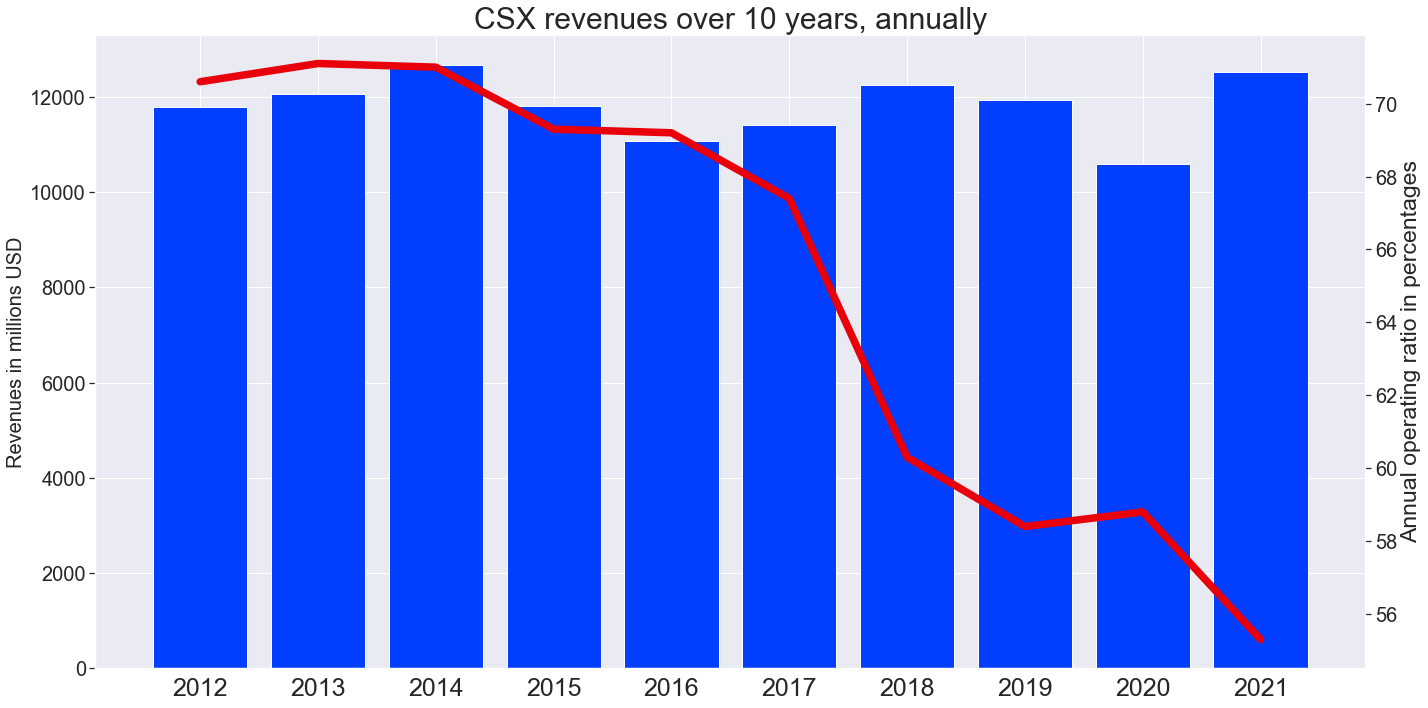

In [14]:
#annual revenues
ann_revs = []
for year in years:
    ann_revs.append(np.sum(data['revenue'].loc[(data['year'] == year)]))

labels_no_22 = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
an_op_ratio = [70.6, 71.1, 71, 69.3, 69.2, 67.4, 60.3, 58.4, 58.8, 55.3]

fig, ax = plt.subplots(figsize = (20, 10))
x = np.arange(len(labels_no_22))
width = 0.2
ax2 = ax.twinx()
sns.set_theme(style='darkgrid', palette='bright')
ax.bar(labels_no_22, ann_revs)
ax.set_xticks(x, labels_no_22, fontsize = 25)
ax.set_ylabel('Revenues in millions USD', fontsize = 20)
ax.set_title('CSX revenues over 10 years, annually', fontsize = 30)
ax2.plot(labels_no_22, an_op_ratio, linewidth = '7.5', color = 'r')
ax2.set_ylabel('Annual operating ratio in percentages', fontsize = 23)
ax2.grid(visible=False)
ax.xaxis.set_tick_params(labelsize=25)
ax.yaxis.set_tick_params(labelsize=20)
ax2.yaxis.set_tick_params(labelsize=20)

fig.tight_layout()
#plt.savefig('revenues_annual_update.png')

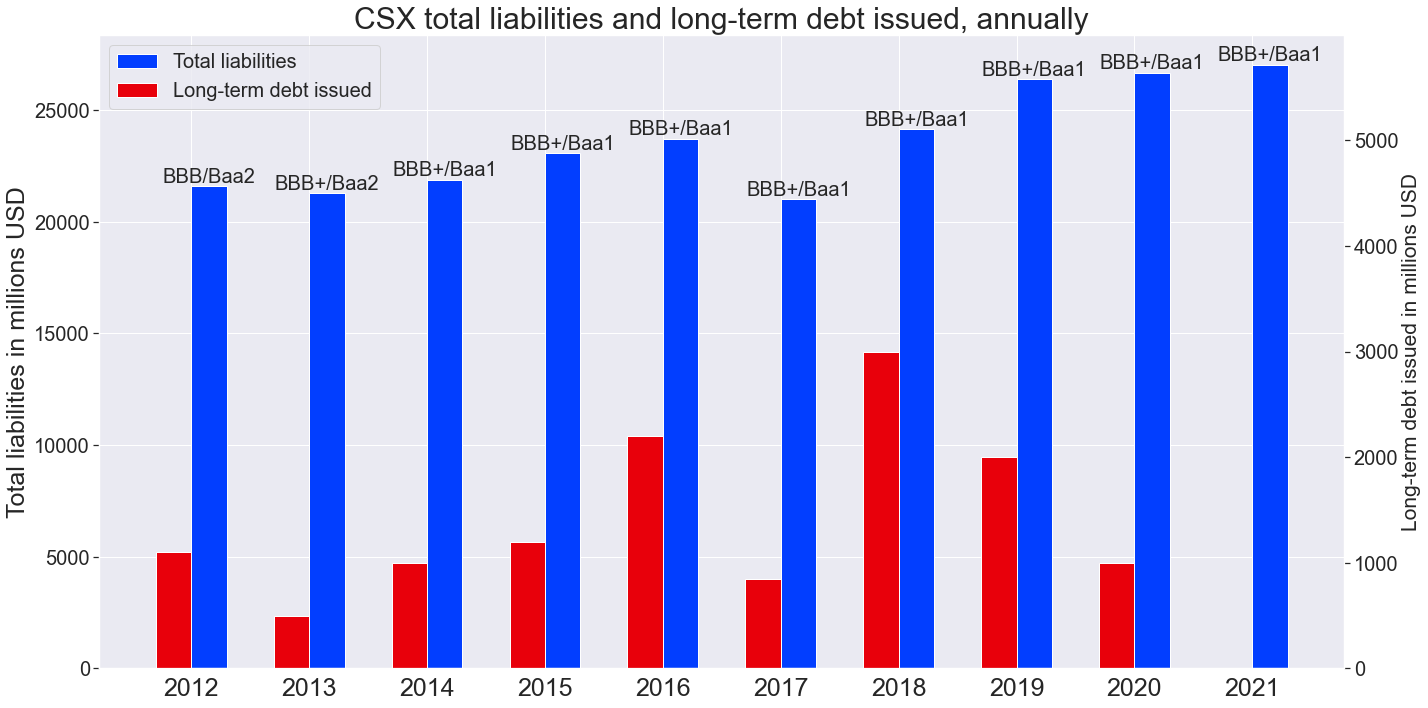

In [15]:
#total liabilities
long_debt_issued = [1100, 500, 1000, 1200, 2200, 850, 3000, 2000, 1000, 0]
tot_lia = [21587, 21278, 21877, 23077, 23720, 21018, 24149, 26394, 26683, 27031]
ratings = ['BBB/Baa2', 'BBB+/Baa2', 'BBB+/Baa1', 'BBB+/Baa1', 'BBB+/Baa1', 'BBB+/Baa1', 'BBB+/Baa1', 'BBB+/Baa1', 'BBB+/Baa1', 'BBB+/Baa1']

sns.set_theme(style='darkgrid', palette='bright')
fig, ax = plt.subplots(figsize = (20, 10))
x = np.arange(len(labels_no_22))
width = 0.3
ax2 = ax.twinx()

p1 = ax.bar(x + width/2, tot_lia,width, label=ratings)
ax.set_xticks(x, labels_no_22, fontsize = 25)
p2 = ax2.bar(x - width/2, long_debt_issued, width, color = 'r')
ax.set_ylabel('Total liabilities in millions USD', fontsize = 25)
ax.set_title('CSX total liabilities and long-term debt issued, annually', fontsize = 30)
ax.yaxis.set_tick_params(labelsize=25)
ax2.set_yticks(np.arange(0,6000, 1000))
ax.bar_label(p1, labels=[ rat for rat in ratings], fontsize = 20)
ax2.set_ylabel('Long-term debt issued in millions USD', fontsize = 21)
ax2.grid(visible=False)
ax2.set_ylim([0, 6000])
ax2.yaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.legend([p1, p2], ['Total liabilities','Long-term debt issued'], loc = 'upper left', fontsize = 20)

fig.tight_layout()
#plt.savefig('debt_annual.png')

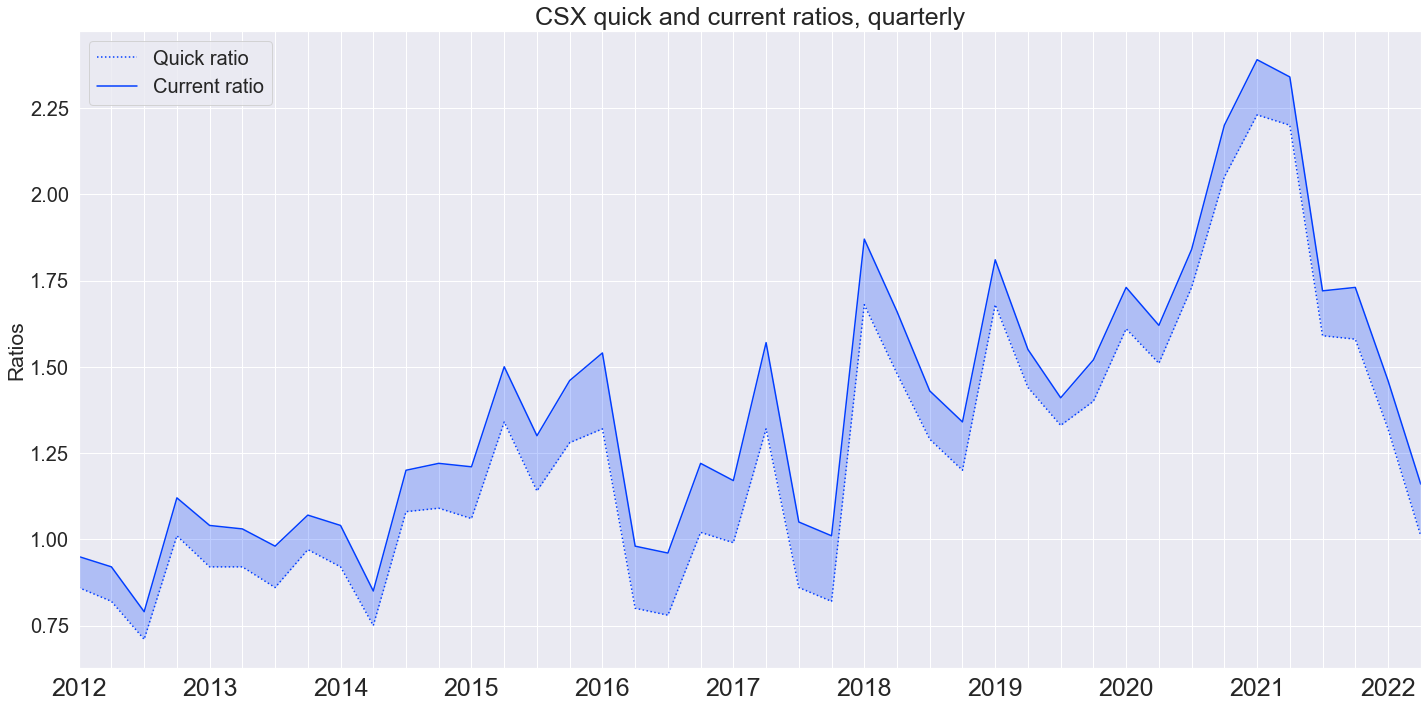

In [16]:
#ratios
quick = data['quick'][:-2]
current = data['current'][:-2]

fig, ax = plt.subplots(figsize = (20,10))
x = np.arange(len(quick))
tic = ['2012', '', '','', '2013', '', '','','2014', '', '','','2015', '', '','','2016', '', '','',
        '2017', '', '','','2018', '', '','','2019', '', '','','2020', '', '','','2021', '', '','', '2022', '']

x_arr = np.array(x)
y1_arr = np.array(quick)
y2_arr = np.array(current)
sns.set_theme(style='darkgrid', palette='bright')
y1 = ax.plot(x, quick, label = 'Quick ratio', linestyle = ':')
y2 = ax.plot(x, current, label = 'Current ratio', linestyle = '-', color = 'b')
ax.set_title('CSX quick and current ratios, quarterly', fontsize = 25)
ax.legend(fontsize = 20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xticks(x, tic, fontsize = 25)
ax.set_xlim([x[0], x[-1]])
ax.set_ylabel('Ratios', fontsize = 21)
ax.grid(visible=True)

ax.fill_between(x_arr, y1_arr, y2_arr, alpha = 0.25)
fig.tight_layout()

#plt.savefig('ratios.png')

-3.246845746539939


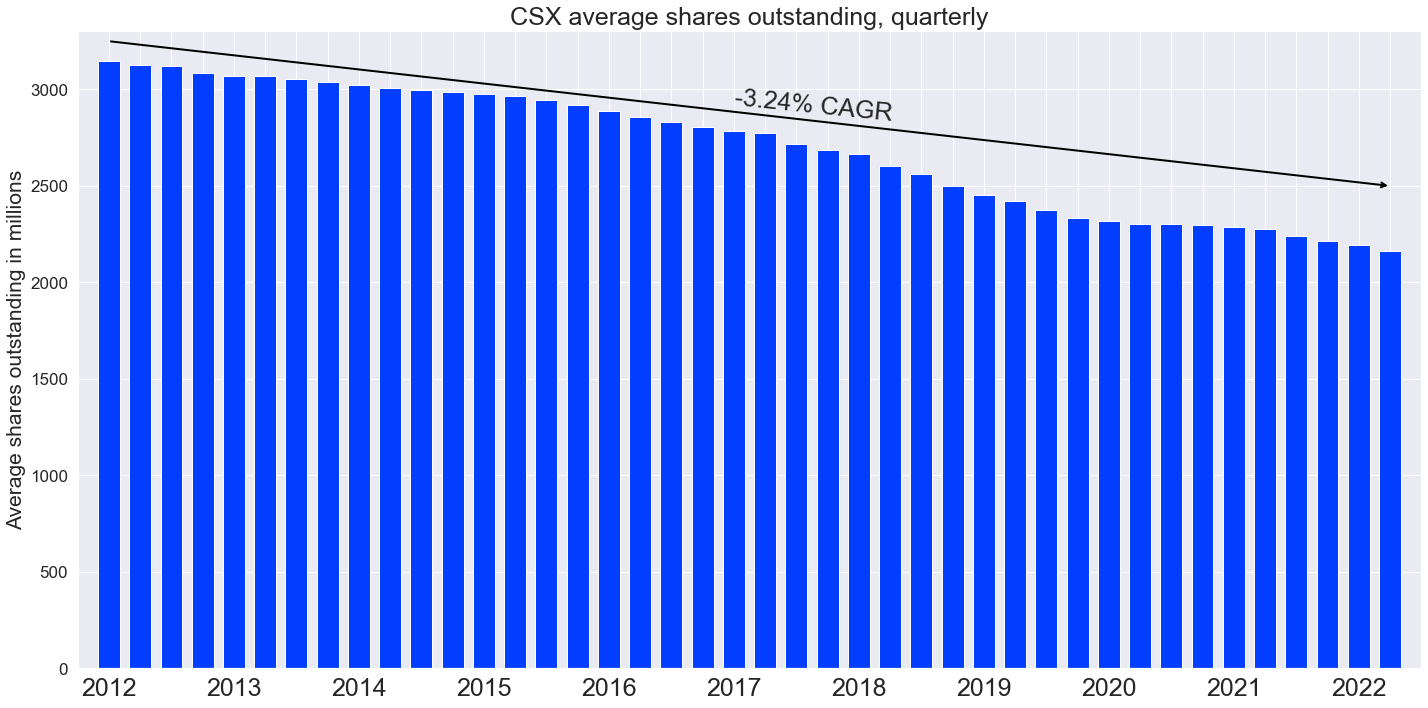

In [17]:
#shares outstanding decrease
shares = data['av shares outstanding'][:-2]
x = np.arange(len(shares))

fig, ax = plt.subplots(figsize = (20,10))
tic = ['2012', '', '','', '2013', '', '','','2014', '', '','','2015', '', '','','2016', '', '','',
        '2017', '', '','','2018', '', '','','2019', '', '','','2020', '', '','','2021', '', '','', '2022', '']

width = 0.7
ax.bar(x, shares, width)
ax.set_title('CSX average shares outstanding, quarterly', fontsize = 25)
ax.yaxis.set_tick_params(labelsize=17)
ax.set_ylabel('Average shares outstanding in millions', fontsize = 21)
ax.set_xticks(x, tic, fontsize = 25)
ax.set_xlim([-1, 42])
ax.annotate("", xy=(41, 2500), xytext=(0, 3250),
            arrowprops=dict(arrowstyle="->", 
            color = 'black', lw = 2))

annotation = (20, 2840)
ax.annotate("-3.24% CAGR", annotation, fontsize = 25, rotation= -5.75)
fig.tight_layout()

#plt.savefig('shares_out.png')

sh_cagr = ((2217/3084) ** (1/10) -1 ) * 100
print(sh_cagr)

20 20


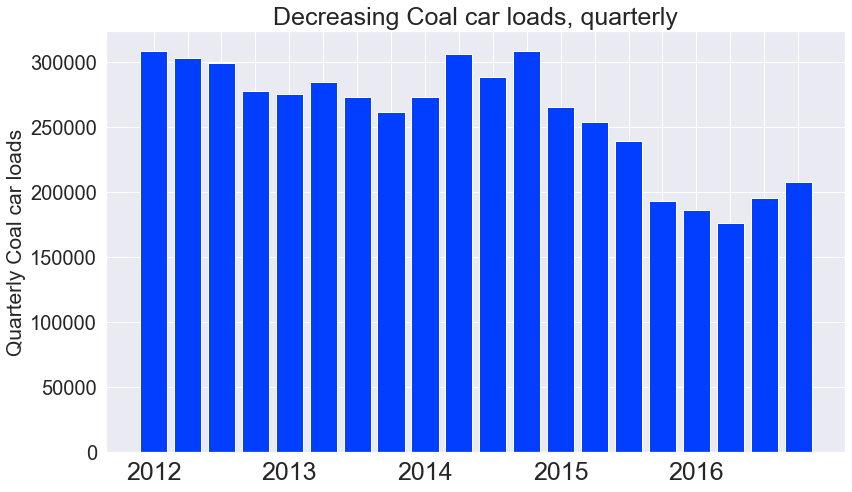

In [18]:
#coal car loads
coal_qtr = []
coal_yr = [2012, 2013, 2014, 2015, 2016]
for yr in coal_yr:
    coal_qtr.append(np.sum(raw_csx_data['CSX'].loc[(raw_csx_data['Year'] == yr) & (raw_csx_data['typecode'] == '04') & (raw_csx_data['Week'] <= 13)]))
    coal_qtr.append(np.sum(raw_csx_data['CSX'].loc[(raw_csx_data['Year'] == yr) & (raw_csx_data['typecode'] == '04') & ((raw_csx_data['Week'] > 13) & (raw_csx_data['Week'] <= 26))]))
    coal_qtr.append(np.sum(raw_csx_data['CSX'].loc[(raw_csx_data['Year'] == yr) & (raw_csx_data['typecode'] == '04') & ((raw_csx_data['Week'] > 26) & (raw_csx_data['Week'] <= 39))]))
    coal_qtr.append(np.sum(raw_csx_data['CSX'].loc[(raw_csx_data['Year'] == yr) & (raw_csx_data['typecode'] == '04') & ((raw_csx_data['Week'] > 39) & (raw_csx_data['Week'] <= 53))]))
    
    
tic = ['2012', '', '','', '2013', '', '','','2014', '', '','','2015', '', '','','2016', '', '','']
x = np.arange(len(coal_qtr))
print(len(x), len(tic))
fig, ax = plt.subplots(figsize = (12,7))

ax.bar(x, coal_qtr)
ax.set_xticks(x, tic, fontsize = 25)
ax.set_ylabel('Quarterly Coal car loads', fontsize = 21)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_title('Decreasing Coal car loads, quarterly', fontsize = 25)
fig.tight_layout()
#plt.savefig('decreasing_coal.png')

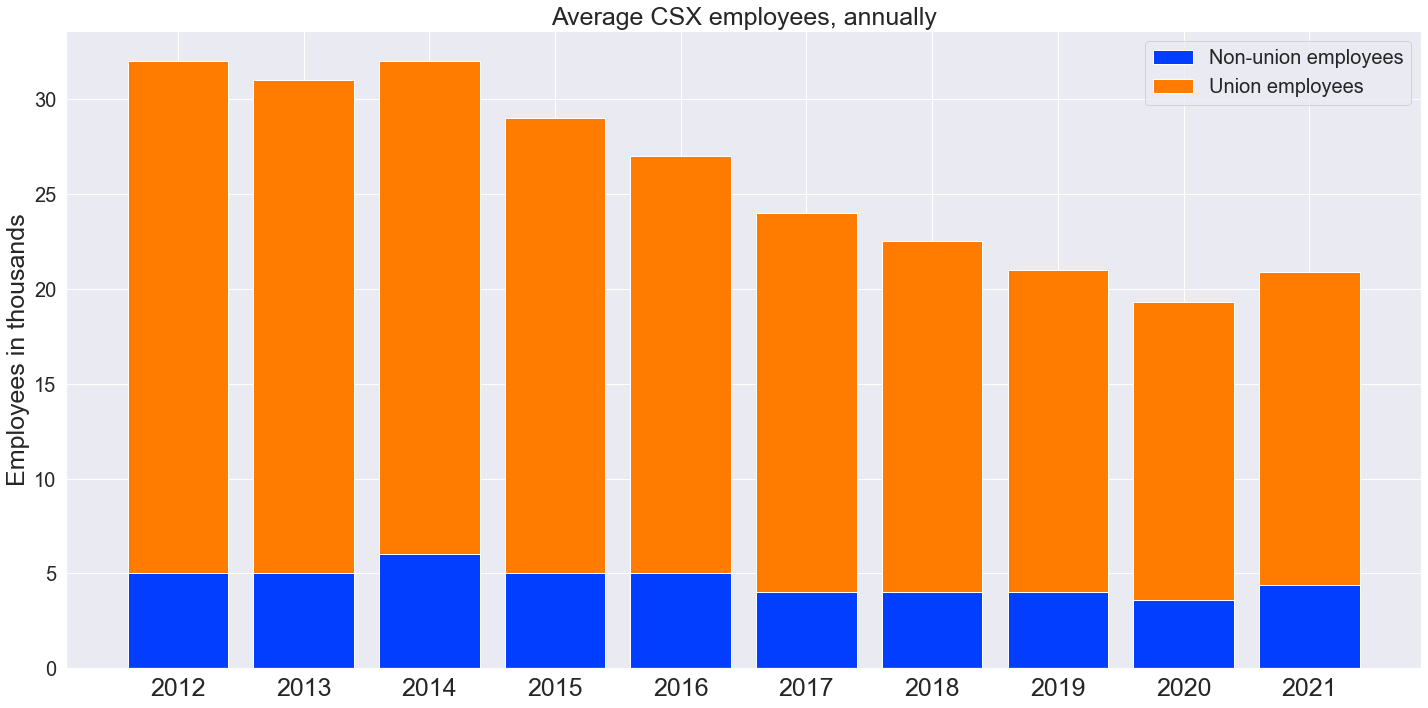

In [19]:
#employees
union =[27, 26, 26, 24, 22, 20, 18.5, 17, 15.7, 16.5]
non_union = [5, 5, 6, 5, 5, 4, 4, 4, 3.6, 4.4]
x = np.arange(len(union))

fig, ax = plt.subplots(figsize= (20,10))
ax.bar(x, non_union, label = 'Non-union employees')
ax.bar(x, union, bottom = non_union,label = 'Union employees')
ax.set_title('Average CSX employees, annually', fontsize = 25)
ax.legend(fontsize = 20)
ax.set_ylabel('Employees in thousands', fontsize = 25)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xticks(x, labels_no_22, fontsize = 25)
fig.tight_layout()

#plt.savefig('employees.png')

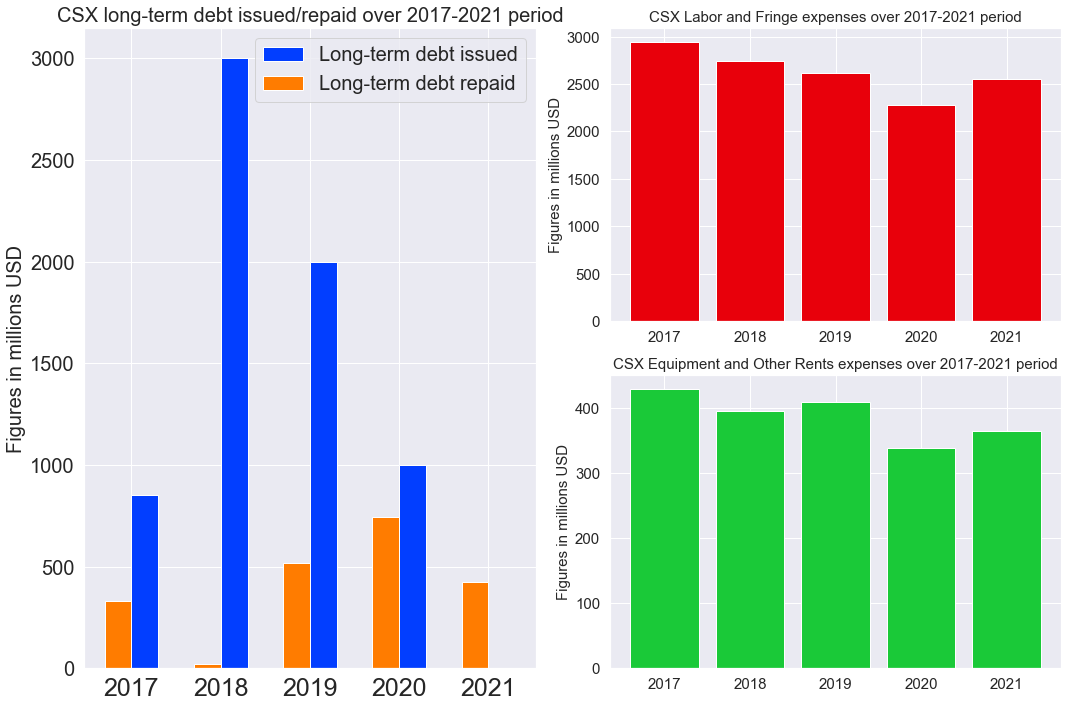

In [20]:
#fringe/eq/debt
debt_iss = [850, 3000, 2000, 1000, 0]
debt_rep = [333, 19, 518, 745, 426]
labor = [2946, 2738, 2616, 2275, 2550]
equipment = [429, 395, 408, 338, 364]
restr = [240, 0, 0, 0, 0]
yrsa = ['2017', '2018', '2019', '2020', '2021']

f = plt.figure(figsize=(15,10))
x = np.arange(len(debt_iss))
width = 0.3

ax1 = f.add_subplot(121)
ax1.bar(x + width/2, debt_iss, width, label = 'Long-term debt issued')
ax1.bar(x - width/2, debt_rep, width, label = 'Long-term debt repaid')
ax1.set_title('CSX long-term debt issued/repaid over 2017-2021 period', fontsize = 20)
ax1.yaxis.set_tick_params(labelsize=20)
ax1.set_xticks(x, yrsa, fontsize = 25)
ax1.set_ylabel('Figures in millions USD', fontsize = 20)
ax1.legend(fontsize = 20)

ax2 = f.add_subplot(222)
ax2.bar(x, labor, color = 'r')
ax2.yaxis.set_tick_params(labelsize=15)
ax2.set_xticks(x, yrsa, fontsize = 15)
ax2.set_ylabel('Figures in millions USD', fontsize = 15)
ax2.set_title('CSX Labor and Fringe expenses over 2017-2021 period', fontsize = 15)

ax3 = f.add_subplot(224)
ax3.bar(x, equipment, color = 'g')
ax3.yaxis.set_tick_params(labelsize=15)
ax3.set_xticks(x, yrsa, fontsize = 15)
ax3.set_ylabel('Figures in millions USD', fontsize = 15)
ax3.set_title('CSX Equipment and Other Rents expenses over 2017-2021 period', fontsize = 15)

f.tight_layout()
#plt.savefig('fringe_eq_debt.png')

In [21]:
#calculations for pie charts
typecodes = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', 'C', 'T']
all_in_12 = []
all_in_17 = []
all_in_21 = []
for ty in typecodes:
    all_in_12.append(np.sum(raw_csx_data['CSX'].loc[(raw_csx_data['Year'] == 2012) & (raw_csx_data['typecode'] == ty)]))
    all_in_17.append(np.sum(raw_csx_data['CSX'].loc[(raw_csx_data['Year'] == 2017) & (raw_csx_data['typecode'] == ty)]))
    all_in_21.append(np.sum(raw_csx_data['CSX'].loc[(raw_csx_data['Year'] == 2021) & (raw_csx_data['typecode'] == ty)]))
    
    
tot12 = np.sum(all_in_12) 
tot17 = np.sum(all_in_17)
tot21 = np.sum(all_in_21)

categories = ['Grain', 'Farm Products (ex. Grain)', 'Metallic ores', 'Coal',
            'Crushed Stone, Sand & Gravel', 'Phosphate Rock', 'Grain Mill Products',
             'Food Products', 'Primary Forest Products', 'Lumber & Wood Products', 
             'Pulp & Paper Products', 'Chemicals', 'Petroleum & Petroleum Products',
             'Stone, Clay & Glass Products', 'Coke', 'Primary Metal Products',
             'Automotive', 'Iron & Steel Scrap', 'Waste & Nonferrous Scrap',
             'All Other Carloads', 'Containers', 'Trailers']

percs12 = []
percs17 = []
percs21 = []

for i in range(len(all_in_21)):
    percs12.append(round(all_in_12[i]/tot12 * 100, 2))
    percs17.append(round(all_in_17[i]/tot17 * 100, 2))
    percs21.append(round(all_in_21[i]/tot21 * 100, 2))
    

#3, 11, 16, 21, 22,     

print(percs12)

[2.43, 0.29, 1.11, 18.55, 3.05, 2.88, 1.68, 1.88, 0.52, 0.83, 2.6, 8.71, 1.35, 1.9, 0.9, 2.58, 6.67, 1.32, 1.6, 0.97, 35.84, 2.34]


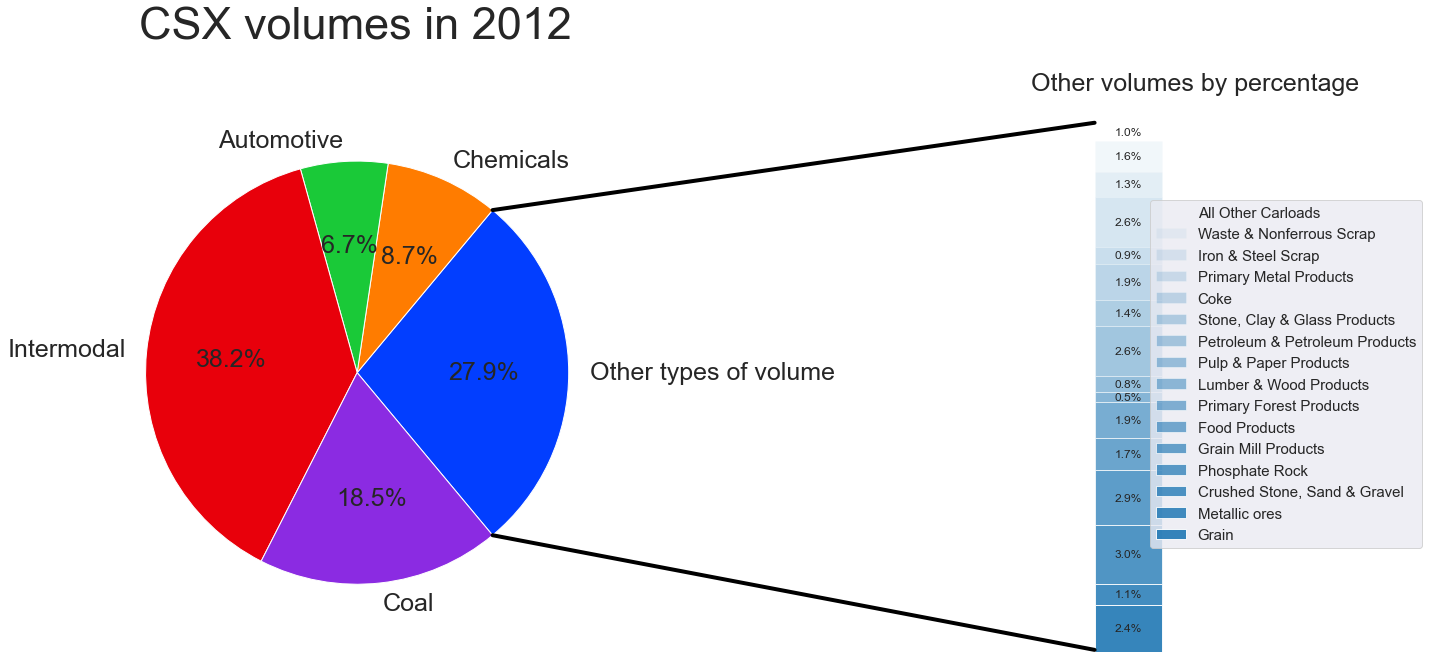

In [22]:
#pie charts - extended version from matplotlib website pt.1 

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [0.2789, .0871, .0667, 0.3818, .1855]
labels = ['Other types of volume', 'Chemicals', 'Automotive', 'Intermodal', 'Coal']
explode = [0, 0, 0, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode, textprops={'fontsize': 25})


ax1.autoscale(True)
# bar chart parameters
vol_ratios = [0.0243, 0.0111, 0.0305, 0.0288, 0.0168, 0.0188, 
             0.0052, 0.0083, 0.026, 0.0135, 0.019, 0.009, 0.0258, 0.0132, 
             0.016, 0.0097]
vol_labs = ['Grain', 'Metallic ores', 
            'Crushed Stone, Sand & Gravel', 'Phosphate Rock', 'Grain Mill Products',
             'Food Products', 'Primary Forest Products', 'Lumber & Wood Products', 
             'Pulp & Paper Products', 'Petroleum & Petroleum Products',
             'Stone, Clay & Glass Products', 'Coke', 'Primary Metal Products',
            'Iron & Steel Scrap', 'Waste & Nonferrous Scrap',
             'All Other Carloads']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (vol, label) in enumerate(reversed([*zip(vol_ratios, vol_labs)])):
    bottom -= vol
    bc = ax2.bar(0, vol, width, bottom=bottom, color='tab:blue', label=label,
                 alpha= 0.06 * j)
    ax2.bar_label(bc, labels=[f"{vol:.1%}"], label_type='center')

ax2.set_title('Other volumes by percentage', fontsize = 25)
ax2.legend(loc = 'center right', fontsize = 15)
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 4.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(vol_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 1), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0.725), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

ax1.set_title('CSX volumes in 2012\n\n', fontsize = 45)

fig.tight_layout()
#plt.savefig('2012_final.png')

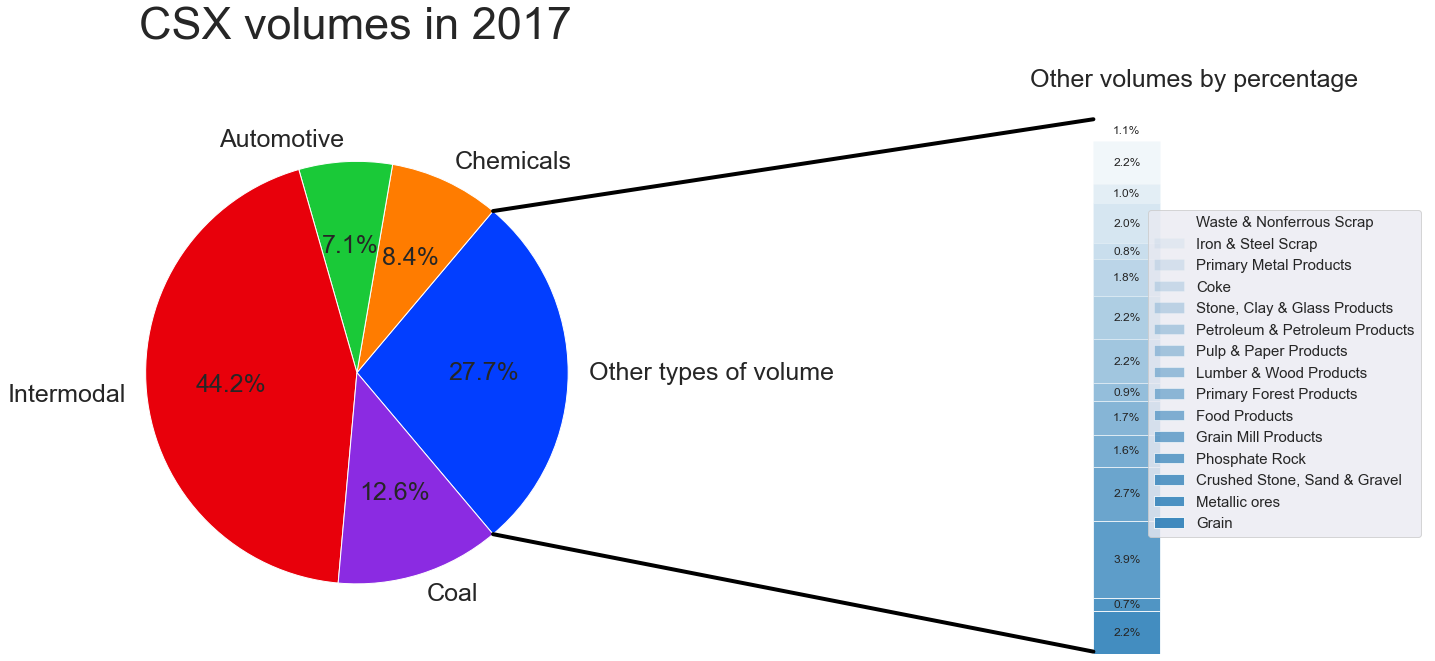

In [23]:
#pie charts - extended version from matplotlib website pt.2

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.subplots_adjust(wspace=0)
[2.18, 0.18, 0.65, 3.91, 2.74, 1.63, 1.7, 0.42, 0.92, 2.21, 2.23, 1.85, 0.79, 2.03, 0.98, 2.18, 1.11]
# pie chart parameters
overall_ratios = [0.2771, .0844, .0714, 0.4415, .1256]
labels = ['Other types of volume', 'Chemicals', 'Automotive', 'Intermodal', 'Coal']
explode = [0, 0, 0, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode, textprops={'fontsize': 25})


ax1.autoscale(True)
# bar chart parameters
vol_ratios = [0.0218, 0.0065, 0.0391, 0.0274, 0.0163, 0.017, 
             0.0092, 0.0221, 0.0223, 0.0185, 0.0079, 0.0203, 0.0098, 
             0.0218, 0.0111]
vol_labs = ['Grain', 'Metallic ores', 
            'Crushed Stone, Sand & Gravel', 'Phosphate Rock', 'Grain Mill Products',
             'Food Products', 'Primary Forest Products', 'Lumber & Wood Products', 
             'Pulp & Paper Products', 'Petroleum & Petroleum Products',
             'Stone, Clay & Glass Products', 'Coke', 'Primary Metal Products',
            'Iron & Steel Scrap', 'Waste & Nonferrous Scrap',
             'All Other Carloads']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (vol, label) in enumerate(reversed([*zip(vol_ratios, vol_labs)])):
    bottom -= vol
    bc = ax2.bar(0, vol, width, bottom=bottom, color='tab:blue', label=label,
                 alpha= 0.06 * j)
    ax2.bar_label(bc, labels=[f"{vol:.1%}"], label_type='center')

ax2.set_title('Other volumes by percentage', fontsize = 25)
ax2.legend(loc = 'center right', fontsize = 15)
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 4.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(vol_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 1), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0.73), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

ax1.set_title('CSX volumes in 2017\n\n', fontsize = 45)

fig.tight_layout()
#plt.savefig('2017_final.png')

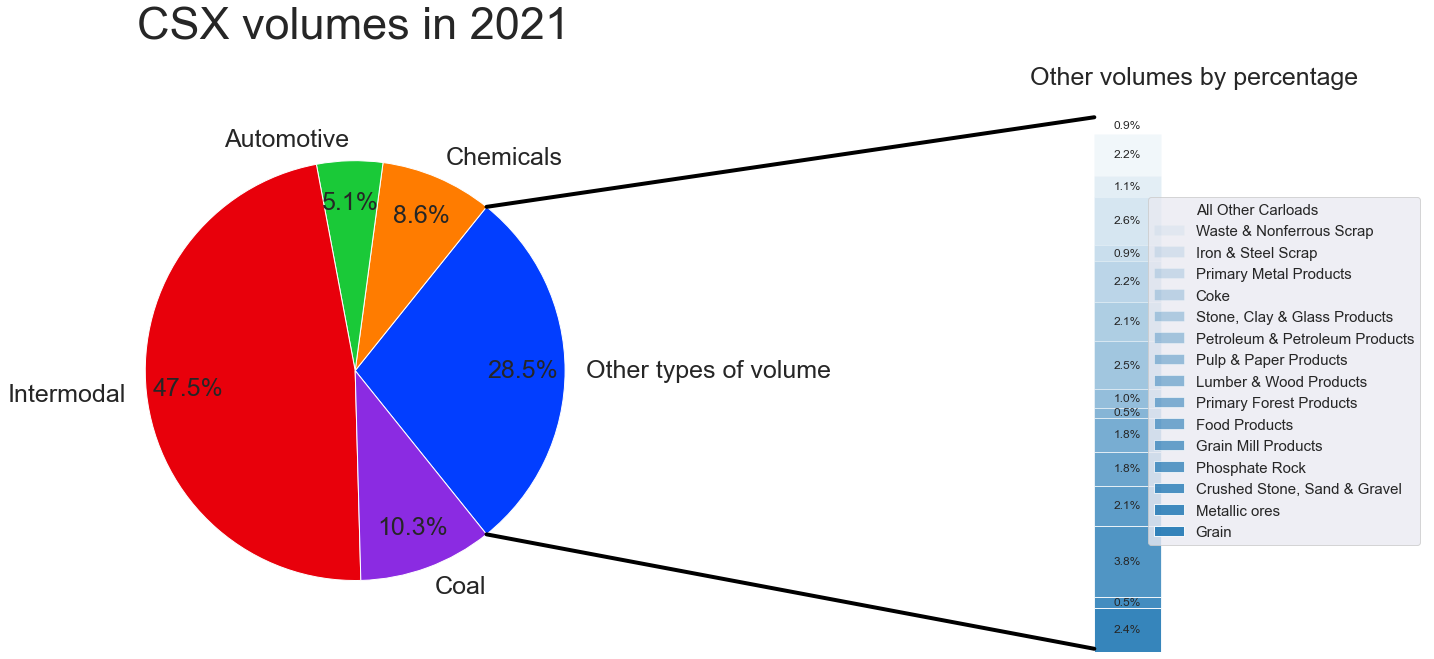

In [24]:
#pie charts - extended version from matplotlib website pt.3

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.subplots_adjust(wspace=0)
[2.35, 0.12, 0.54, 3.79, 2.14, 1.79, 1.82, 0.51, 1.0, 2.54, 2.06, 2.17, 0.88, 2.56, 1.11, 2.23, 0.87]
# pie chart parameters
overall_ratios = [0.2848, .0864, .0508, 0.4747, .1033]
labels = ['Other types of volume', 'Chemicals', 'Automotive', 'Intermodal', 'Coal']
explode = [0, 0, 0, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode, textprops={'fontsize': 25}, pctdistance = .8)


ax1.autoscale(True)
# bar chart parameters
vol_ratios = [0.0235, 0.0054, 0.0379, 0.0214, 0.0179, 0.0182, 
             0.0051, 0.01, 0.0254, 0.0206, 0.0217, 0.0088, 0.0256, 0.0111, 
             0.0223, 0.0087]
vol_labs = ['Grain',  'Metallic ores', 
            'Crushed Stone, Sand & Gravel', 'Phosphate Rock', 'Grain Mill Products',
             'Food Products', 'Primary Forest Products', 'Lumber & Wood Products', 
             'Pulp & Paper Products', 'Petroleum & Petroleum Products',
             'Stone, Clay & Glass Products', 'Coke', 'Primary Metal Products',
            'Iron & Steel Scrap', 'Waste & Nonferrous Scrap',
             'All Other Carloads']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (vol, label) in enumerate(reversed([*zip(vol_ratios, vol_labs)])):
    bottom -= vol
    bc = ax2.bar(0, vol, width, bottom=bottom, color='tab:blue', label=label,
                 alpha= 0.06 * j)
    ax2.bar_label(bc, labels=[f"{vol:.1%}"], label_type='center')

ax2.set_title('Other volumes by percentage', fontsize = 25)
ax2.legend(loc = 'center right', fontsize = 15)
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 4.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(vol_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 1), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0.718), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

ax1.set_title('CSX volumes in 2021\n\n', fontsize = 45)

fig.tight_layout()
#plt.savefig('2021_final.png')

[557947, 538297, 540516]


/var/folders/td/0fd086y975d05tl0yk_kp20h0000gn/T/ipykernel_73693/1923864723.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(0, 3500, 500))


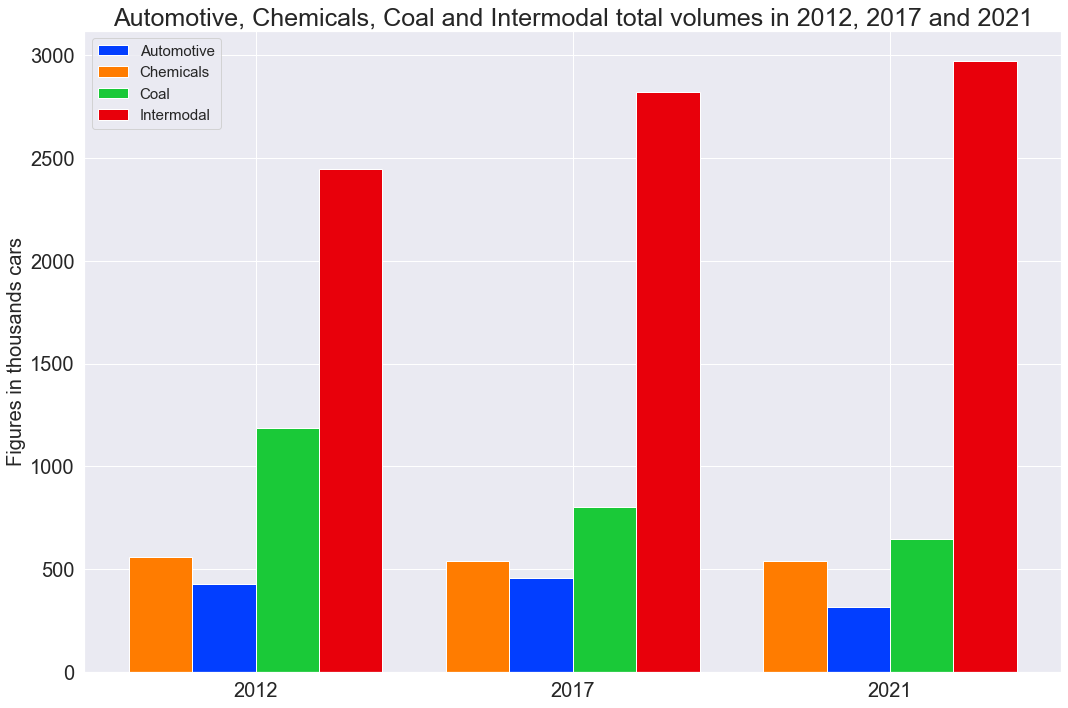

In [25]:
#volume types in 2012, 2017 and 2021
years = [2012, 2017, 2021]
typecodes = ['04', '12', '17', 'C', 'T']
aut = []
cl = []
chem = []
inte = []

for year in years:
    aut.append(np.sum(raw_csx_data['CSX'].loc[(raw_csx_data['Year'] == year) & (raw_csx_data['typecode'] == '17')]))
    cl.append(np.sum(raw_csx_data['CSX'].loc[(raw_csx_data['Year'] == year) & (raw_csx_data['typecode'] == '04')]))
    chem.append(np.sum(raw_csx_data['CSX'].loc[(raw_csx_data['Year'] == year) & (raw_csx_data['typecode'] == '12')]))
    inte.append(np.sum(raw_csx_data['CSX'].loc[(raw_csx_data['Year'] == year) & (raw_csx_data['typecode'] == 'C')]) + np.sum(raw_csx_data['CSX'].loc[(raw_csx_data['Year'] == year) & (raw_csx_data['typecode'] == 'T')]))

print(chem)
x = np.arange(len(inte))
width = 0.2
fig, ax = plt.subplots(figsize = (15, 10))

ax.bar(x - width/2, aut, width, label = 'Automotive')
ax.bar(x - 3*width/2, chem, width, label = 'Chemicals')
ax.bar(x + width/2, cl, width, label = 'Coal')
ax.bar(x + 3*width/2, inte, width, label = 'Intermodal')
ax.legend(fontsize = 15)
ax.grid()
ax.set_xticks(x, years, fontsize = 20)
ax.set_title('Automotive, Chemicals, Coal and Intermodal total volumes in 2012, 2017 and 2021', fontsize = 25)
ax.set_yticklabels(np.arange(0, 3500, 500))
ax.set_ylabel('Figures in thousands cars', fontsize = 20)
ax.yaxis.set_tick_params(labelsize=20)
ax.grid()
fig.tight_layout()
#plt.savefig('automotive_chem_coal_intermodal_volumes.png')


In [26]:
#csx and nsc numbers for comparison
nsc_lia = [20582, 21194, 20792, 21951, 22483, 19352, 20877, 22739, 23171, 24852]
csx_lia = [21587, 21278, 21877, 23077, 23720, 21018, 24149, 26394, 26683, 27031]

nsc_rev = [11040, 11245, 11624, 10511, 9888, 10551, 11458, 11296, 9789, 11142]
csx_rev = [11763, 12026, 12669, 11811, 11069, 11408, 12250, 11937, 10583, 12522]

nsc_fcf = [824, 1107, 797, 523, 1147, 1530, 1775, 1873, 2143, 2785]
csx_fcf = [721, 895, 919, 992, 847, 1701, 3199, 3818, 2646, 3833]

nsc_div = [624, 637, 687, 713, 695, 703, 844, 949, 960, 1028]
csx_div = [558, 600, 629, 686, 680, 708, 751, 763, 797, 839]

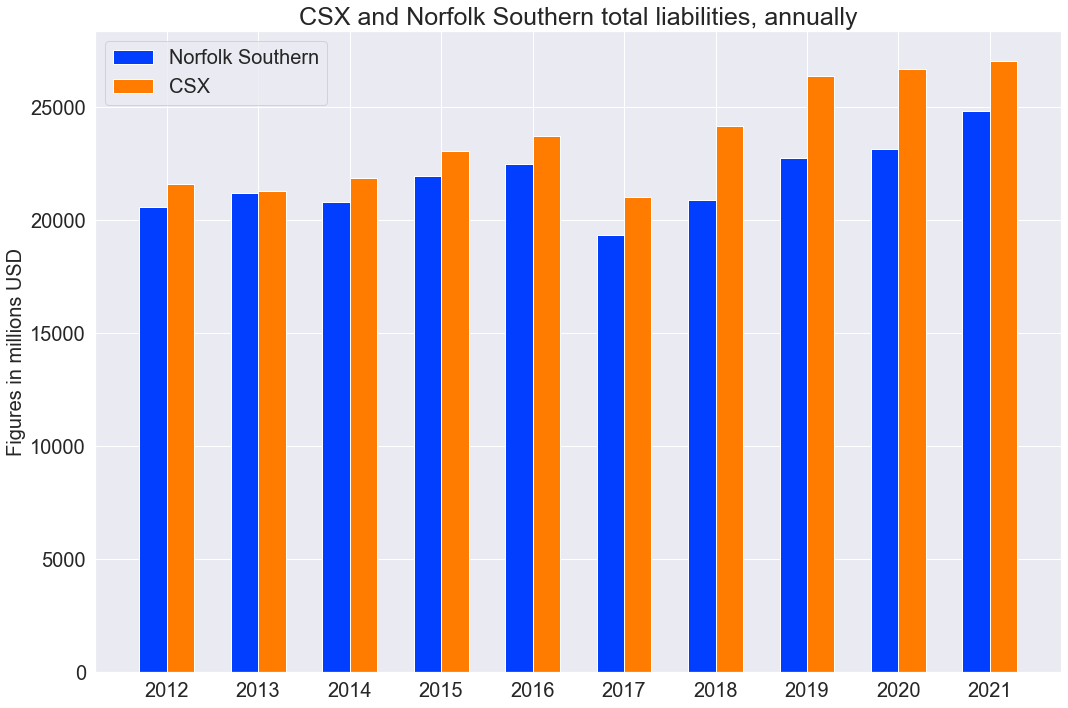

In [27]:
#csx and nsc total liabilities
x = np.arange(len(nsc_lia))
width = 0.3
sns.set_theme(style='darkgrid', palette='bright')

fig, ax = plt.subplots(figsize = (15, 10))
years = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

ax.bar(x - width/2, nsc_lia, width, label = 'Norfolk Southern')
ax.bar(x + width/2, csx_lia, width, label = 'CSX')
ax.legend(fontsize = 20)
ax.set_xticks(x, years, fontsize = 20)
ax.set_title('CSX and Norfolk Southern total liabilities, annually', fontsize = 25)
ax.set_ylabel('Figures in millions USD', fontsize = 20)
ax.yaxis.set_tick_params(labelsize=20)

fig.tight_layout()
#plt.savefig('csx_nsc_liabilities.png')

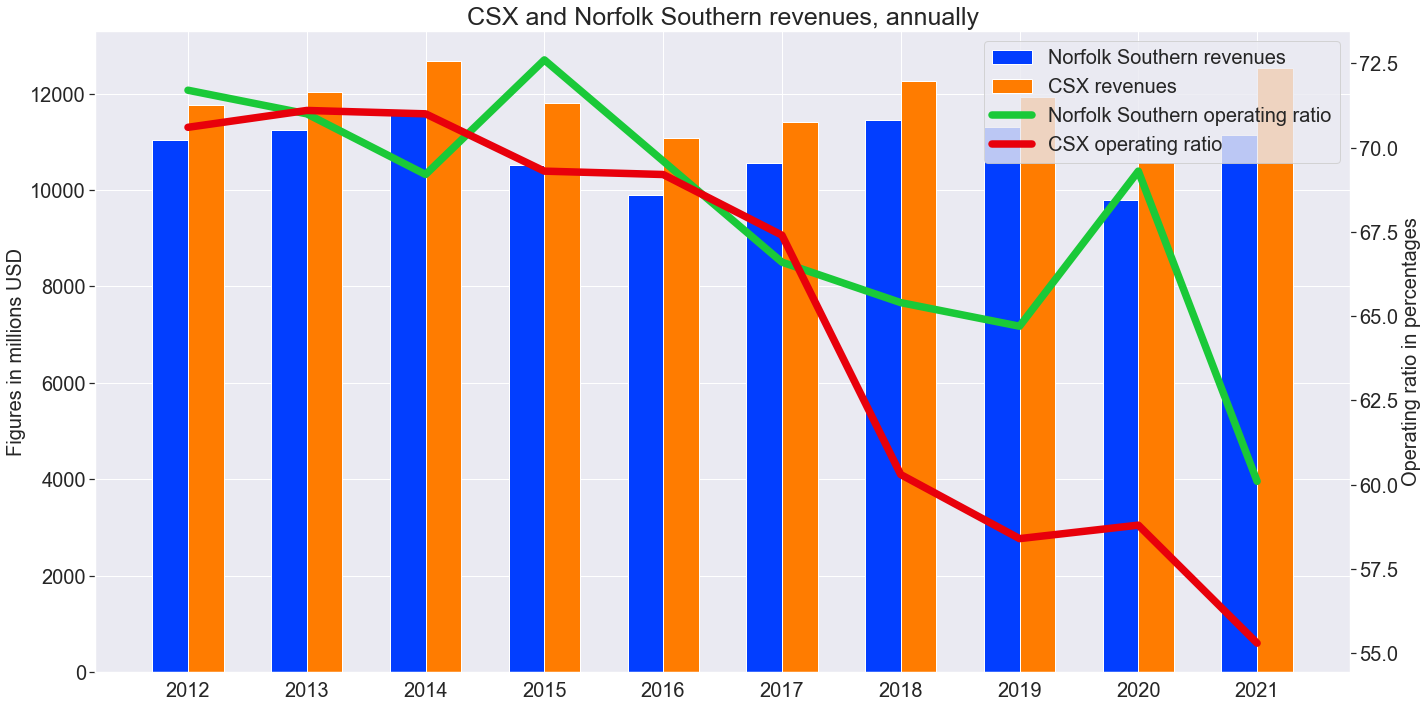

In [28]:
#csx and nsc revs and operating ratios
x = np.arange(len(nsc_lia))
width = 0.3
sns.set_theme(style='dark', palette='bright')
fig, ax = plt.subplots(figsize = (20, 10))
years = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

nsc_op = [71.7, 71, 69.2, 72.6, 69.6, 66.6, 65.4, 64.7, 69.3, 60.1]
csx_op = [70.6, 71.1, 71, 69.3, 69.2, 67.4, 60.3, 58.4, 58.8, 55.3]

ax2 = ax.twinx()
ax.bar(x - width/2, nsc_rev, width, label = 'Norfolk Southern revenues')
ax.bar(x + width/2, csx_rev, width, label = 'CSX revenues')
ax.set_xticks(x, years, fontsize = 20)
ax.set_title('CSX and Norfolk Southern revenues, annually', fontsize = 25)
ax.set_ylabel('Figures in millions USD', fontsize = 20)
ax2.plot(x, nsc_op, linewidth = '7.5', color = 'g', label = 'Norfolk Southern operating ratio')
ax2.plot(x, csx_op, linewidth = '7.5', color = 'r', label = 'CSX operating ratio')
ax.yaxis.set_tick_params(labelsize=20)
ax2.yaxis.set_tick_params(labelsize=20)
ax.grid()
ax2.set_ylabel('Operating ratio in percentages', fontsize = 20)
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, fontsize = 20)


fig.tight_layout()
#plt.savefig('csx_nsc_revenues.png')

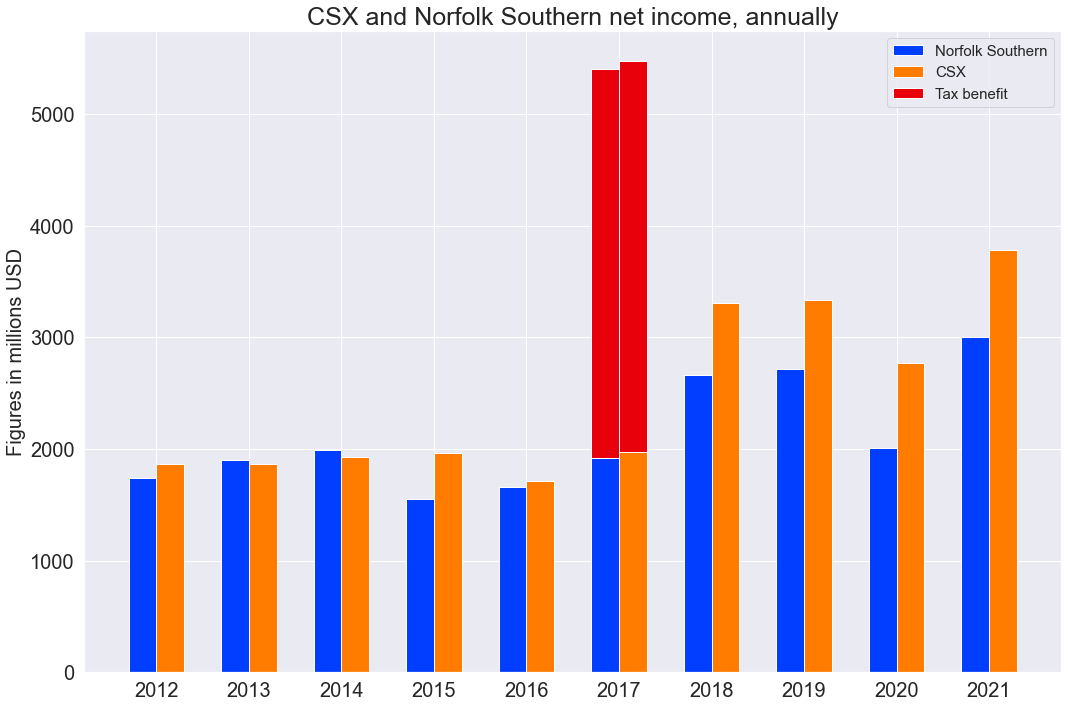

In [29]:
#csx and nsc net income
nsc_ear = [1740, 1903, 1994, 1550, 1663, 1918, 2660, 2717, 2010, 3003]
csx_ear = [1863, 1864, 1927, 1968, 1714, 1971, 3309, 3331, 2765, 3781]
nsc_add = [0,0,0,0,0,3482,0,0,0,0]
csx_add = [0,0,0,0,0,3500,0,0,0,0]
sns.set_theme(style='darkgrid', palette='bright')
x = np.arange(len(nsc_lia))
width = 0.3

fig, ax = plt.subplots(figsize = (15, 10))
years = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

ax.bar(x - width/2, nsc_ear, width, label = 'Norfolk Southern')
ax.bar(x + width/2, csx_ear, width, label = 'CSX')
ax.bar(x - width/2, nsc_add, width, bottom=nsc_ear, color = 'r', label = 'Tax benefit')
ax.bar(x + width/2, csx_add, width, bottom=csx_ear, color = 'r')
ax.legend(fontsize = 15)
ax.set_xticks(x, years, fontsize = 20)
ax.set_title('CSX and Norfolk Southern net income, annually', fontsize = 25)
ax.set_ylabel('Figures in millions USD', fontsize = 20)
ax.yaxis.set_tick_params(labelsize=20)

fig.tight_layout()
#plt.savefig('csx_nsc_net_inc.png')

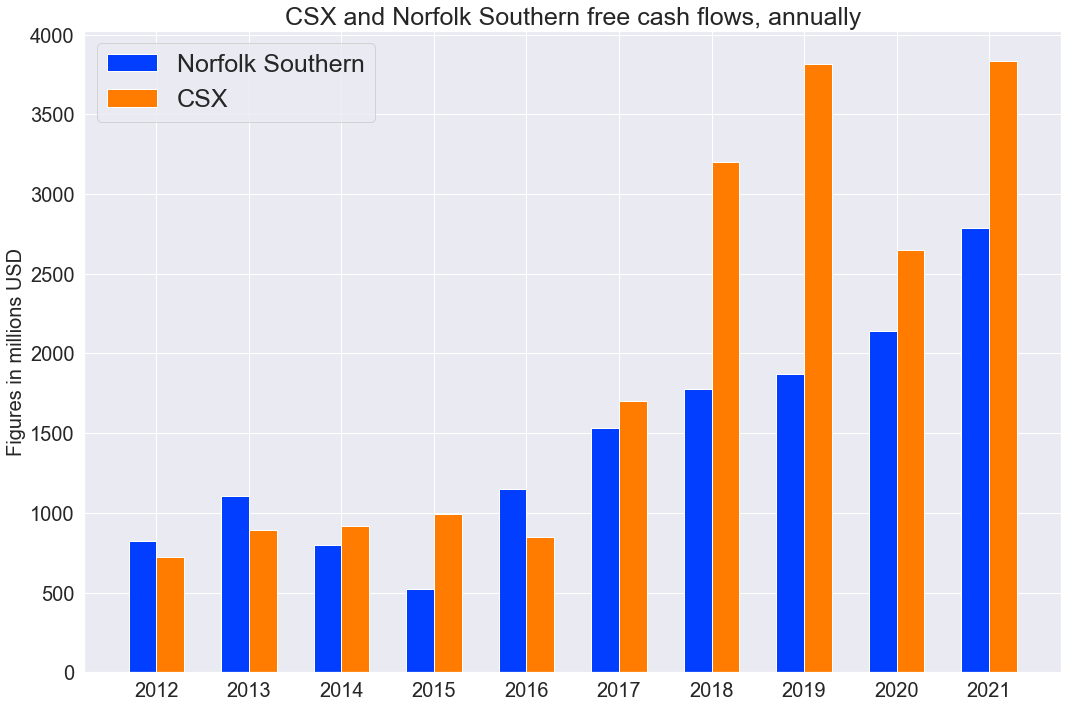

In [30]:
#csx and nsc free cash flows
x = np.arange(len(nsc_lia))
width = 0.3

fig, ax = plt.subplots(figsize = (15, 10))
years = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

ax.bar(x - width/2, nsc_fcf, width, label = 'Norfolk Southern')
ax.bar(x + width/2, csx_fcf, width, label = 'CSX')
ax.legend(fontsize = 25)
ax.set_xticks(x, years, fontsize = 20)
ax.set_title('CSX and Norfolk Southern free cash flows, annually', fontsize = 25)
ax.set_ylabel('Figures in millions USD', fontsize = 20)
ax.yaxis.set_tick_params(labelsize=20)

fig.tight_layout()
#plt.savefig('csx_nsc_fcf.png')

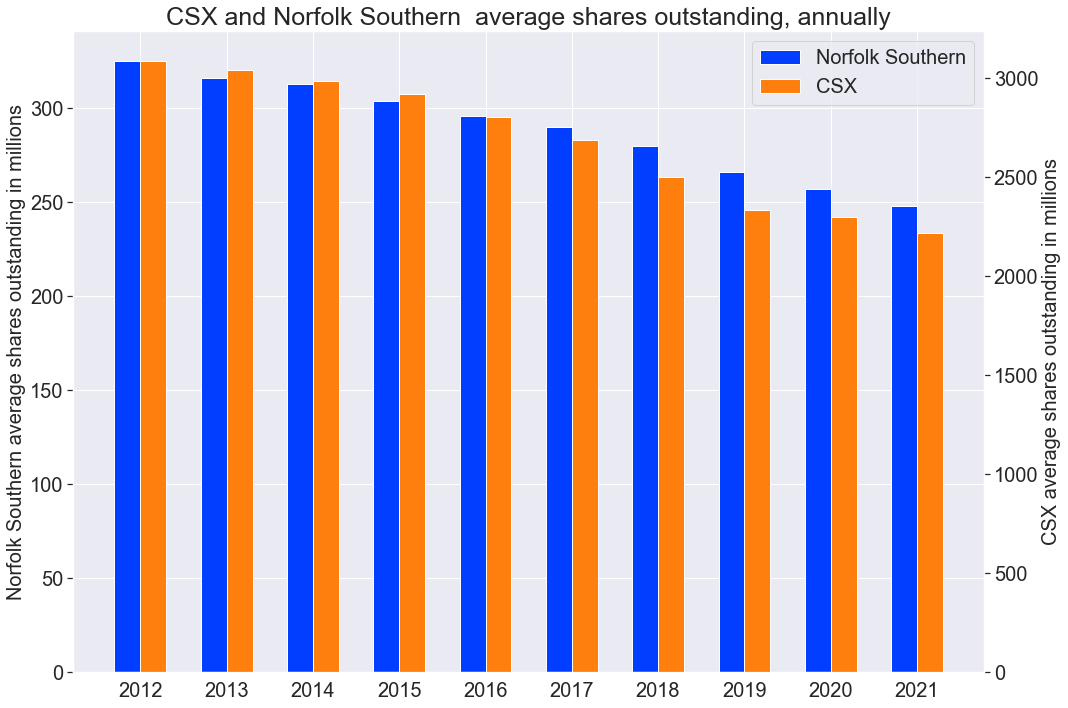

In [31]:
#csx and nsc average shares outstanding
nsc_sha = [325, 316, 313, 304, 296, 290, 280, 266, 257, 248]
csx_sha = [3084, 3039, 2985, 2919, 2805, 2688, 2499, 2334, 2298, 2217]

sns.set_theme(style='darkgrid', palette='bright')
x = np.arange(len(nsc_lia))
width = 0.3
fig, ax = plt.subplots(figsize = (15, 10))
years = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
ax2 = ax.twinx()

p1 = ax.bar(x - width/2, nsc_sha, width, label = 'Norfolk Southern')
p2 = ax2.bar(x + width/2, csx_sha, width, label = 'CSX', color = 'tab:orange')

ax.set_xticks(x, years, fontsize = 20)
ax.set_title('CSX and Norfolk Southern  average shares outstanding, annually', fontsize = 25)
ax.set_ylabel('Norfolk Southern average shares outstanding in millions', fontsize = 20)
ax.yaxis.set_tick_params(labelsize=20)
ax2.yaxis.set_tick_params(labelsize=20)
ax2.set_ylabel('CSX average shares outstanding in millions', fontsize = 20)
ax2.grid(visible=False)
plt.legend([p1, p2], ['Norfolk Southern','CSX'], fontsize = 20)

fig.tight_layout()
#plt.savefig('csx_nsc_shares.png')

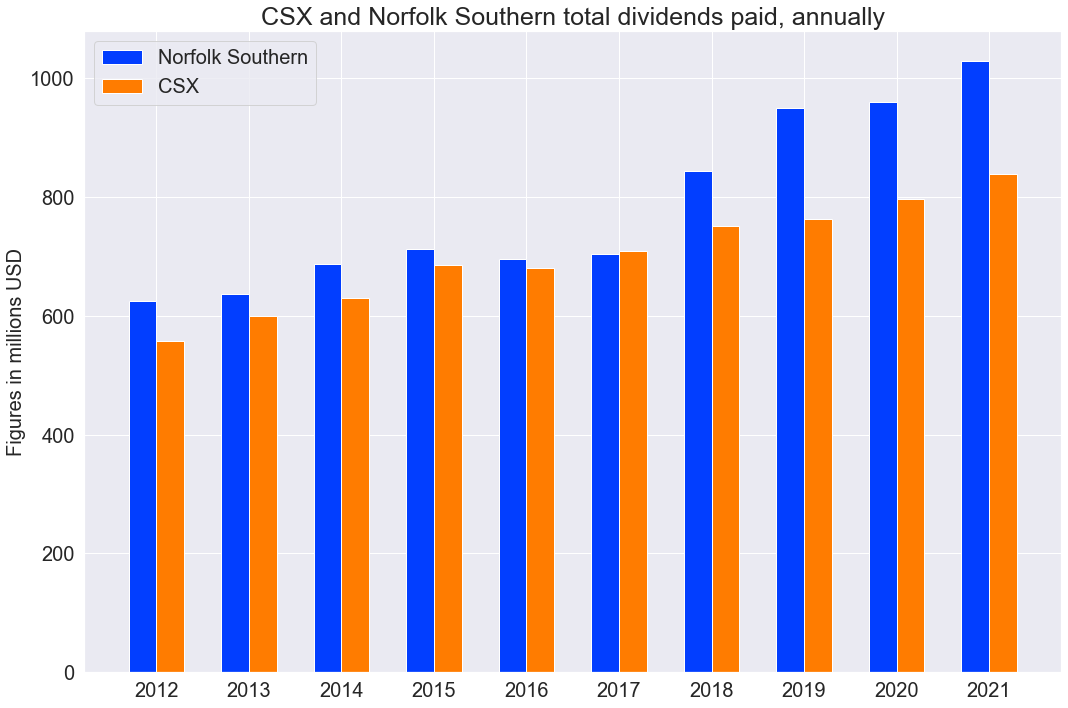

In [32]:
#csx and nsc dividends
x = np.arange(len(nsc_lia))
width = 0.3
sns.set_theme(style='darkgrid', palette='bright')
fig, ax = plt.subplots(figsize = (15, 10))
years = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

ax.bar(x - width/2, nsc_div, width, label = 'Norfolk Southern')
ax.bar(x + width/2, csx_div, width, label = 'CSX')
ax.legend(fontsize = 20)
ax.set_xticks(x, years, fontsize = 20)
ax.set_title('CSX and Norfolk Southern total dividends paid, annually', fontsize = 25)
ax.set_ylabel('Figures in millions USD', fontsize = 20)
ax.yaxis.set_tick_params(labelsize=20)


fig.tight_layout()
#plt.savefig('csx_nsc_dividends.png')

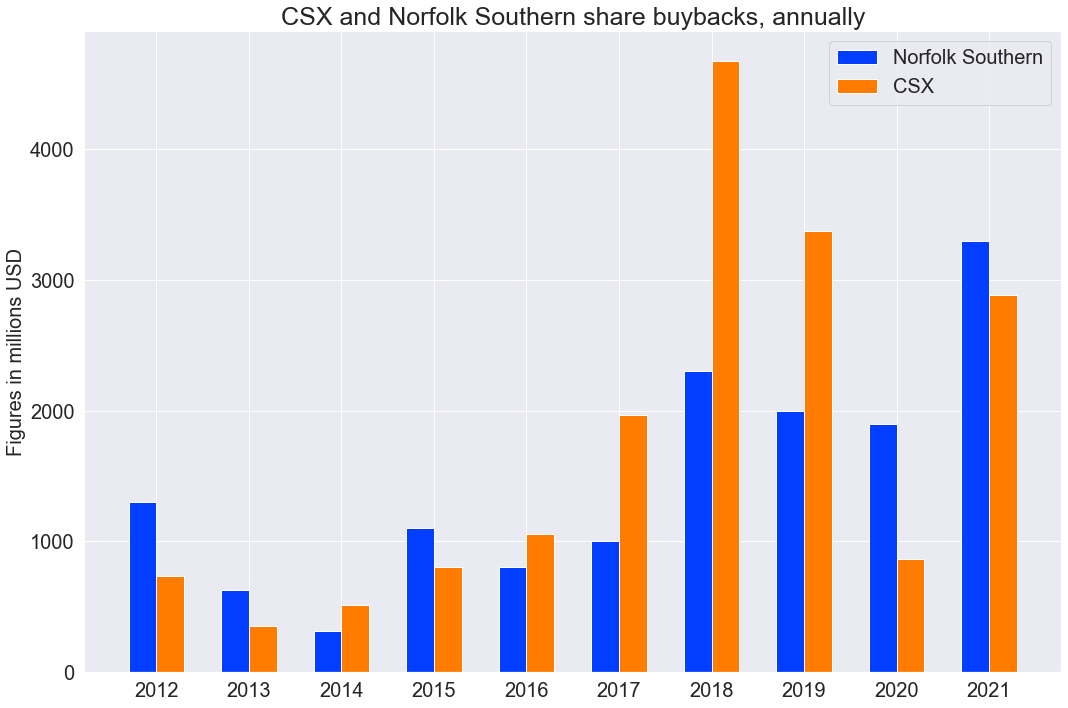

In [33]:
#csx and nsc buybacks
nsc_buy = [1300, 627, 318, 1100, 803, 1000, 2300, 2000, 1900, 3300]
csx_buy = [734, 353, 517, 804, 1056, 1970, 4671, 3373, 867, 2886]

x = np.arange(len(nsc_lia))
width = 0.3

fig, ax = plt.subplots(figsize = (15, 10))
years = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

ax.bar(x - width/2, nsc_buy, width, label = 'Norfolk Southern')
ax.bar(x + width/2, csx_buy, width, label = 'CSX')
ax.legend(fontsize = 20)
ax.set_xticks(x, years, fontsize = 20)
ax.set_title('CSX and Norfolk Southern share buybacks, annually', fontsize = 25)

ax.set_ylabel('Figures in millions USD', fontsize = 20)
ax.yaxis.set_tick_params(labelsize=20)


fig.tight_layout()
#plt.savefig('csx_nsc_buyback.png')

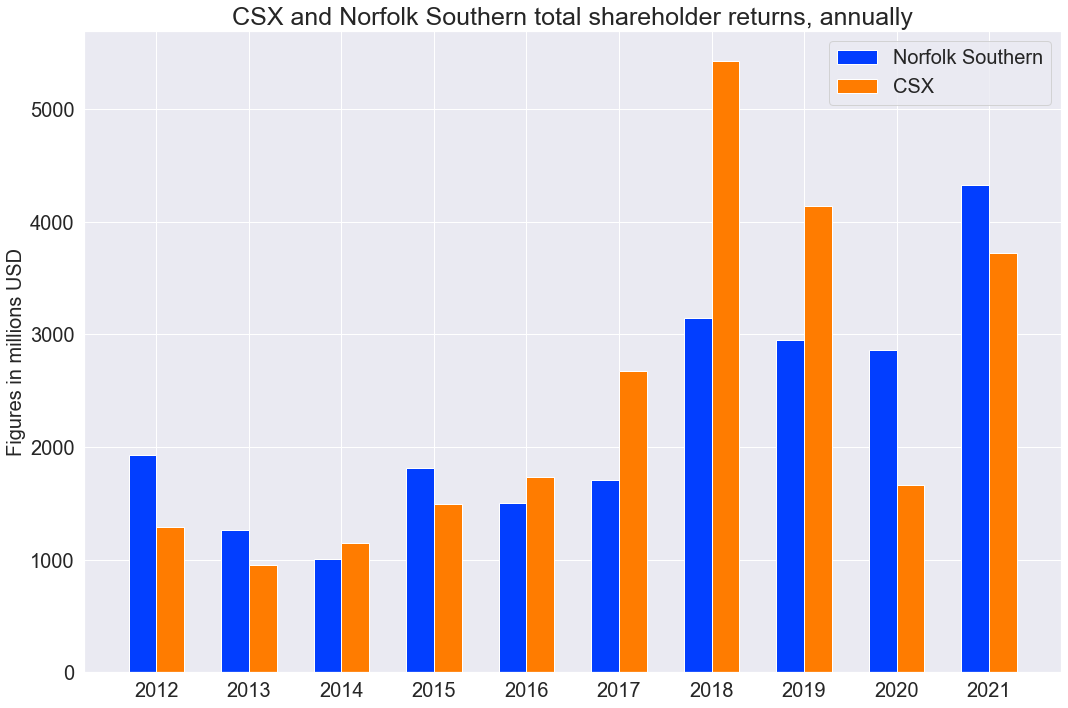

In [34]:
#csx and nsc total shareholder returns
nsc_ret = []
csx_ret = []

for i in range(len(nsc_buy)):
    nsc_ret.append(nsc_buy[i] + nsc_div[i])
    csx_ret.append(csx_buy[i] + csx_div[i])

x = np.arange(len(nsc_lia))
width = 0.3

fig, ax = plt.subplots(figsize = (15, 10))
years = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

ax.bar(x - width/2, nsc_ret, width, label = 'Norfolk Southern')
ax.bar(x + width/2, csx_ret, width, label = 'CSX')
ax.legend(fontsize = 20)
ax.set_xticks(x, years, fontsize = 20)
ax.set_title('CSX and Norfolk Southern total shareholder returns, annually', fontsize = 25)
ax.set_ylabel('Figures in millions USD', fontsize = 20)
ax.yaxis.set_tick_params(labelsize=20)


fig.tight_layout()
#plt.savefig('csx_nsc_total_returns.png')

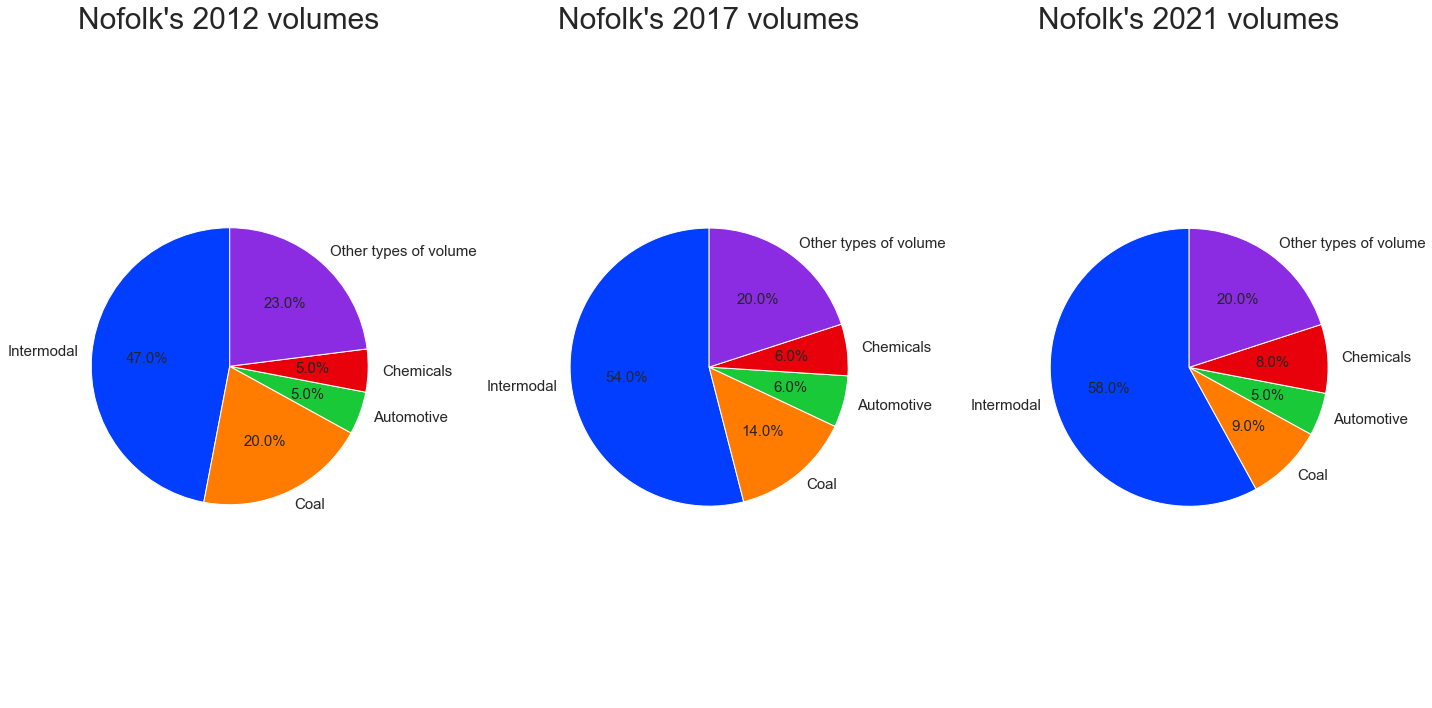

In [35]:
#nsc volumes comparison
nsc2012 = [0.47, 0.2, 0.05, 0.05, 0.23]
nsc2017 = [0.54, 0.14, 0.06, 0.06, 0.2]
nsc2021 = [0.58, 0.09, 0.05, 0.08, 0.2]

labels = ['Intermodal', 'Coal', 'Automotive', 'Chemicals', 'Other types of volume']

sns.color_palette("husl", 8)
f = plt.figure(figsize=(20,10))

ax1 = f.add_subplot(131)
ax1.pie(nsc2012, labels = labels, shadow = False, startangle = 90, autopct='%.1f%%', textprops={'fontsize': 15})
ax1.axis('equal')  
ax1.set_title('Nofolk\'s 2012 volumes', fontsize = 30)

ax2 = f.add_subplot(132)
ax2.pie(nsc2017, labels = labels, shadow = False, startangle = 90, autopct='%.1f%%', textprops={'fontsize': 15})
ax2.axis('equal')
ax2.set_title('Nofolk\'s 2017 volumes', fontsize = 30)

ax3 = f.add_subplot(133)
ax3.pie(nsc2021, labels = labels, shadow = False, startangle = 90, autopct='%.1f%%', textprops={'fontsize': 15})
ax3.axis('equal')
ax3.set_title('Nofolk\'s 2021 volumes', fontsize = 30)

f.tight_layout()
#plt.savefig('nsc_vol_simplified.png')

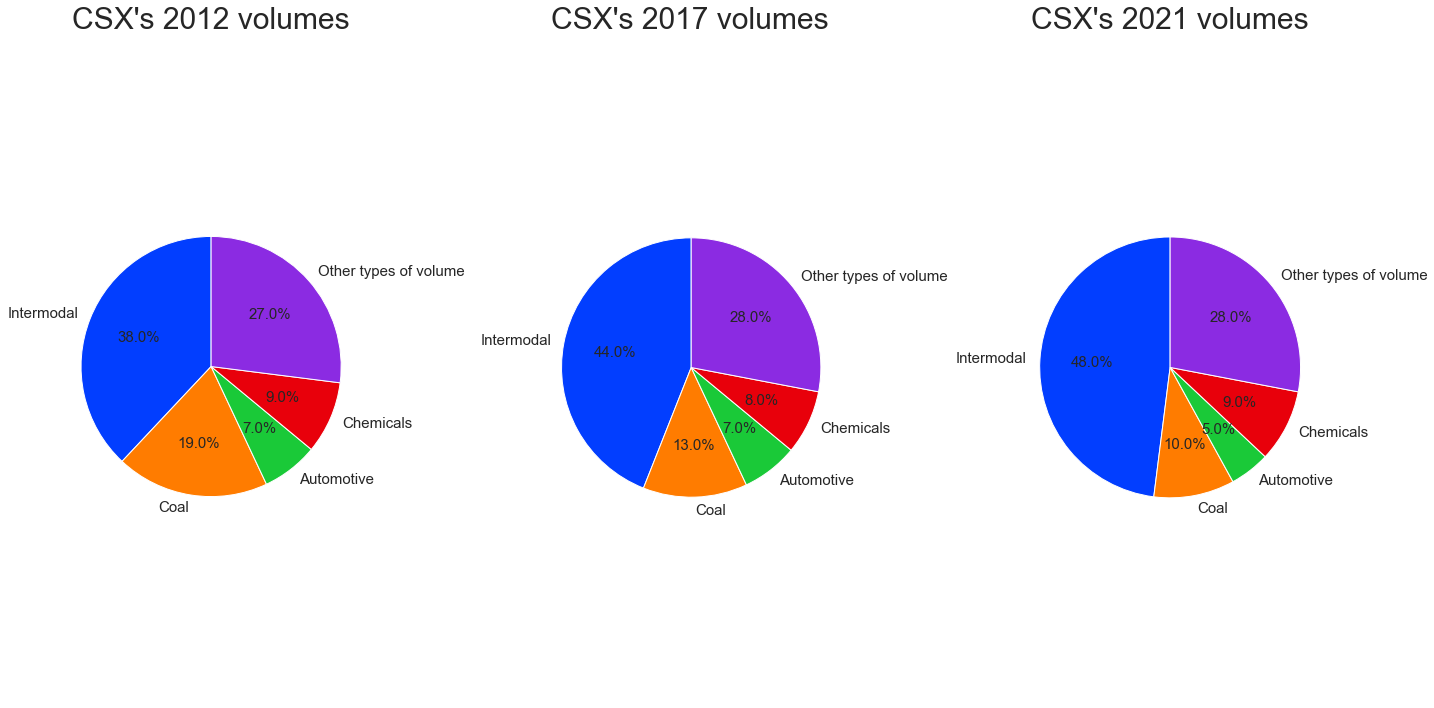

In [36]:
#csx volume comparison
csx2012 = [0.38, 0.19, 0.07, 0.09, 0.27]
csx2017 = [0.44, 0.13, 0.07, 0.08, 0.28]
csx2021 = [0.48, 0.1, 0.05, 0.09, 0.28]

sns.color_palette("husl", 8)
f = plt.figure(figsize=(20,10))

ax1 = f.add_subplot(131)
ax1.pie(csx2012, labels = labels, shadow = False, startangle = 90, autopct='%.1f%%', textprops={'fontsize': 15})
ax1.axis('equal')  
ax1.set_title('CSX\'s 2012 volumes', fontsize = 30)

ax2 = f.add_subplot(132)
ax2.pie(csx2017, labels = labels, shadow = False, startangle = 90, autopct='%.1f%%', textprops={'fontsize': 15})
ax2.axis('equal')
ax2.set_title('CSX\'s 2017 volumes', fontsize = 30)

ax3 = f.add_subplot(133)
ax3.pie(csx2021, labels = labels, shadow = False, startangle = 90, autopct='%.1f%%', textprops={'fontsize': 15})
ax3.axis('equal')
ax3.set_title('CSX\'s 2021 volumes', fontsize = 30)

f.tight_layout()
#plt.savefig('csx_vol_simplified.png')

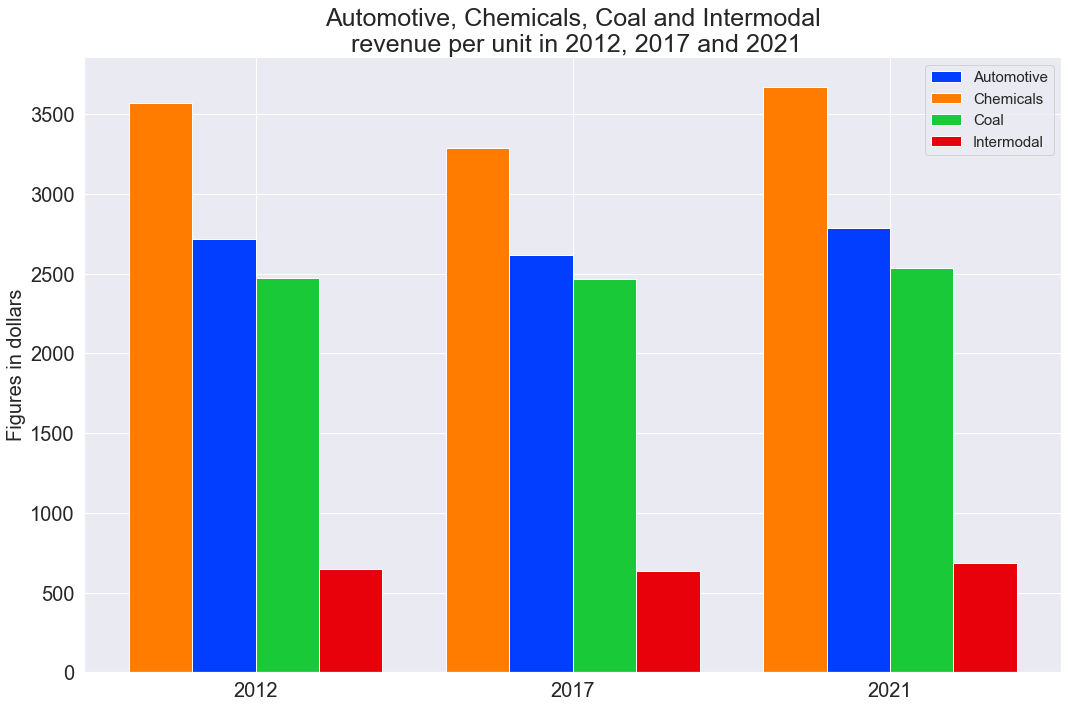

In [37]:
#csx revenue per unit
years = [2012, 2017, 2021]

unit2012 = [650, 2473, 2715, 3571]
unit2017 = [633, 2464, 2615, 3289]
unit2021 = [685, 2535, 2786, 3674]

interm = [650, 633, 685]
coal = [2473, 2464, 2535]
auto = [2715, 2615, 2786]
chem = [3571, 3289, 3674]

x = np.arange(len(years))

fig, ax = plt.subplots(figsize = (15, 10))
width = 0.2

ax.bar(x - width/2, auto, width, label = 'Automotive')
ax.bar(x - 3*width/2, chem, width, label = 'Chemicals')
ax.bar(x + width/2, coal, width, label = 'Coal')
ax.bar(x + 3*width/2, interm, width, label = 'Intermodal')

ax.legend(fontsize = 15)
ax.set_xticks(x, years, fontsize = 20)
ax.set_title('Automotive, Chemicals, Coal and Intermodal\n revenue per unit in 2012, 2017 and 2021', fontsize = 25)

ax.set_ylabel('Figures in dollars', fontsize = 20)
ax.yaxis.set_tick_params(labelsize=20)

fig.tight_layout()
#plt.savefig('automotive_chem_coal_intermodal_unit_rev.png')